In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat
import PIL
import matplotlib.pyplot as plt
import os
from PIL import Image
import math
import shutil
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Loading data directly from url :

# Importing librairies :
import requests
import math
import tarfile
import shutil

# Creating folder :
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, "data")
os.makedirs(DATA_PATH, exist_ok=True)

# Downloading data :
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
if url.find('/'):
  file_name = url.rsplit('/', 1)[1]

r = requests.get(url, allow_redirects=True)
open(file_name, 'wb').write(r.content)

# Extracting data from tarfile :
download_path = os.path.join('/content', file_name)
archive_file_path = os.path.join(DATA_PATH, file_name)
shutil.move(download_path, archive_file_path)

with tarfile.open(archive_file_path, 'r') as file:
  file.extractall(DATA_PATH)

print("Data downloaded and extracted from archive.")
print("Saved to ", DATA_PATH)




Data downloaded and extracted from archive.
Saved to  /content/data


In [ ]:
IMAGE_FOLDER_PATH = os.path.join(DATA_PATH, 'Images')
IMAGE_FOLDER_PATH

'/content/data/Images'

# Preprocessing :

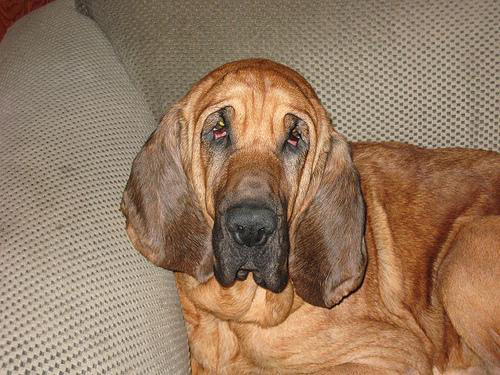

In [ ]:
# Test image :

from PIL import Image

example_subfolder_path = os.path.join(IMAGE_FOLDER_PATH, os.listdir(IMAGE_FOLDER_PATH)[0])

example_image_path = os.path.join(example_subfolder_path, os.listdir(example_subfolder_path)[9]) 
# 10th image of the 1st subfolder of the 'Images' folder 

img = Image.open(example_image_path) 

img

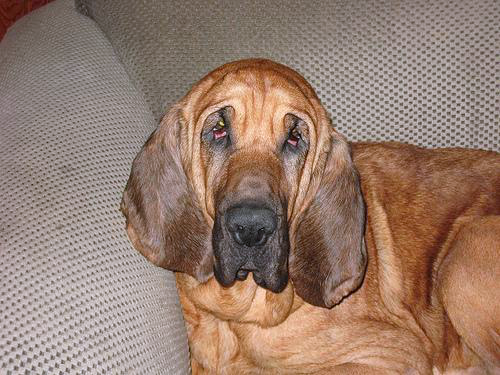

In [ ]:
# Histogram manipulation : Autocontrast

from PIL import ImageOps

img2 = PIL.ImageOps.autocontrast(img)

img2

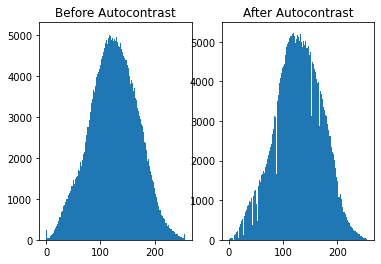

In [ ]:
# Showing differences (if any) in the histogram of pixel intensity after autocontrast : 

plt.subplot(1,2,1)
plt.title("Before Autocontrast")
n, bins, patches = plt.hist(np.array(img).flatten(), bins=range(256))

plt.subplot(1,2,2)
plt.title("After Autocontrast")
n, bins, patches = plt.hist(np.array(img2).flatten(), bins=range(256))

plt.show()

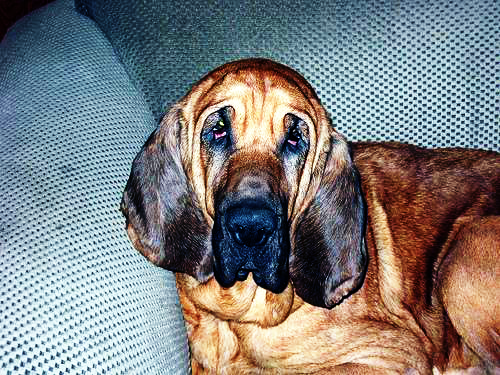

In [ ]:
# Histogram manipulation : Equalizing 

img3 = PIL.ImageOps.equalize(img2)

img3

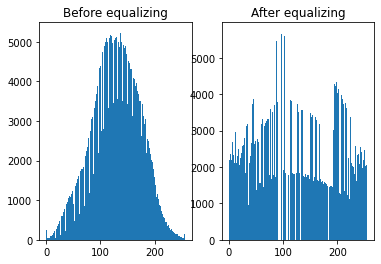

In [ ]:
# Showing differences (if any) in the histogram of pixel intensity after equalizing : 

plt.subplot(1,2,1)
plt.title("Before equalizing")
n, bins, patches = plt.hist(np.array(img2).flatten(), bins=range(256))

plt.subplot(1,2,2)
plt.title("After equalizing")
n, bins, patches = plt.hist(np.array(img3).flatten(), bins=range(256))

plt.show()

Median value for height :  375.0
Average value for height :  385.8612244897959


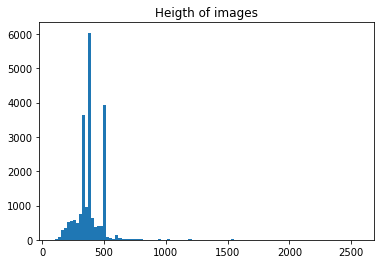

Median value for width :  500.0
Average value for width :  442.5318756073858


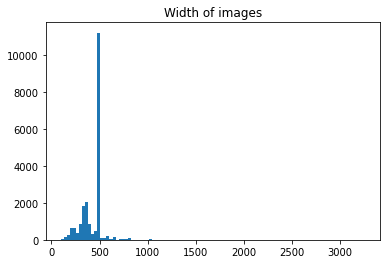

In [ ]:
## Testing sizes of images :

# Getting all heigths and widths from images :
heights = []
widths = []
for breed in os.listdir(IMAGE_FOLDER_PATH):
  subfolder_path = os.path.join(IMAGE_FOLDER_PATH, breed)
  for image_name in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_name)
    heights.append(np.array(Image.open(image_path)).shape[0])
    widths.append(np.array(Image.open(image_path)).shape[1])

# Printing statistics :
import statistics

print("Median value for height : ", statistics.median(heights))
print("Average value for height : ", statistics.mean(heights))

plt.hist(heights, bins=100)
plt.title("Heigth of images")
plt.show()

print("Median value for width : ", statistics.median(widths))
print("Average value for width : ", statistics.mean(widths))

plt.hist(widths, bins=100)
plt.title("Width of images")
plt.show()




Height before resizing :  375
Width before resizing :  500


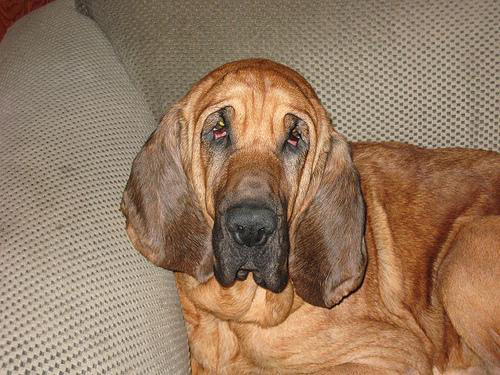

In [ ]:
# Test of resizing with median values :

width = int(statistics.median(widths))
height = int(statistics.median(heights))

print("Height before resizing : ", np.array(img).shape[0])
print("Width before resizing : ", np.array(img).shape[1])

img_resized = img.resize((width, height))
img_resized

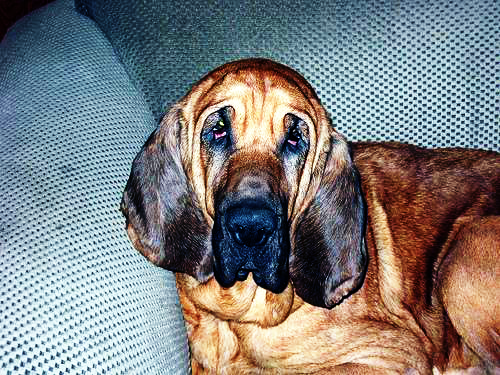

In [ ]:
## Preprocessing transformator creation :

from sklearn.base import BaseEstimator, TransformerMixin

class ImagePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, path, y=None):
        import PIL
        from PIL import Image
        
        return self
    
    def transform(self, path, resize_width=500, resize_height=375):
        # Loading image :
        img = Image.open(path)
        # Autocontrast :
        try :
            img = PIL.ImageOps.autocontrast(img)
        except OSError:
            pass
        # Whitening :
        try :
            img = PIL.ImageOps.equalize(img)
        except OSError:
            pass
        # Resize :
        img = img.resize((resize_width, resize_height))
        
        return img

# test :

preprocessor = ImagePreprocessor()

preprocessed_img = preprocessor.fit_transform(example_image_path)

preprocessed_img

In [ ]:
### Preprocessing all images with these preparation steps and saving them in a new folder :

# Creating new folder :
SAVE_FOLDER_PATH = os.path.join(DATA_PATH, 'Preprocessed_images')
os.makedirs(SAVE_FOLDER_PATH, exist_ok=True)

# Processing images and saving them 

breed_counter = 0

for breed_name in os.listdir(IMAGE_FOLDER_PATH):
  
  # Getting breed paths ready and create new subfolder :
  breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_name)
  breed_path_new = os.path.join(SAVE_FOLDER_PATH, breed_name)
  os.makedirs(breed_path_new, exist_ok=True)

  # Getting images, preprocess them and save them in the new folder :
  for image_name in os.listdir(breed_path_original):

    # Getting image :
    image_path_original = os.path.join(breed_path_original, image_name)
    
    # Preprocessing steps :
    preprocessed_img = preprocessor.fit_transform(image_path_original)

    # Convert to "RGB" mode (needed to save) :
    preprocessed_img = preprocessed_img.convert("RGB")

    # Saving in the new subfolder :
    os.chdir(breed_path_new)
    preprocessed_img.save(image_name +'.jpg')

  breed_counter+=1

  print(breed_counter, " breeds already preprocessed and saved.")

1  breeds already preprocessed and saved.
2  breeds already preprocessed and saved.
3  breeds already preprocessed and saved.
4  breeds already preprocessed and saved.
5  breeds already preprocessed and saved.
6  breeds already preprocessed and saved.
7  breeds already preprocessed and saved.
8  breeds already preprocessed and saved.
9  breeds already preprocessed and saved.
10  breeds already preprocessed and saved.
11  breeds already preprocessed and saved.
12  breeds already preprocessed and saved.
13  breeds already preprocessed and saved.
14  breeds already preprocessed and saved.
15  breeds already preprocessed and saved.
16  breeds already preprocessed and saved.
17  breeds already preprocessed and saved.
18  breeds already preprocessed and saved.
19  breeds already preprocessed and saved.
20  breeds already preprocessed and saved.
21  breeds already preprocessed and saved.
22  breeds already preprocessed and saved.
23  breeds already preprocessed and saved.
24  breeds already p

In [ ]:
### Splitting preprocessed data into train_set, validation_set and test_set ; and saving them all :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :

SPLITTED_PATH = os.path.join(DATA_PATH, "splitted")
os.makedirs(SPLITTED_PATH, exist_ok=True)

TRAIN_PATH = os.path.join(SPLITTED_PATH, 'train')
os.makedirs(TRAIN_PATH, exist_ok=True)

TEST_PATH = os.path.join(SPLITTED_PATH, 'test')
os.makedirs(TRAIN_PATH, exist_ok=True)

VALIDATION_PATH = os.path.join(SPLITTED_PATH, 'validation')
os.makedirs(VALIDATION_PATH, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(SAVE_FOLDER_PATH): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(SAVE_FOLDER_PATH, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH, breed_folder)
    breed_path_test = os.path.join(TEST_PATH, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
# Batch generation :

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) # normalization of pixels

train_generator = datagen.flow_from_directory(TRAIN_PATH,
                                              batch_size=32,
                                              target_size=(128, 128), # Setting to 128x128 size
                                              class_mode="categorical") 
                                              # classes are automatically inferred from the subdirectory structure

val_generator = datagen.flow_from_directory(VALIDATION_PATH,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
# Models path

ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 9.4 MB/s 


# Baseline :

### Very simple Neural network

In [ ]:
import keras

baseline = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                        input_shape=[128,128,3],
                                                        kernel_size=3, # filters 3x3
                                                        activation='relu',
                                                        padding="SAME"),
                                    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(128, activation='relu'),
                                    keras.layers.Dense(120, activation = 'softmax')])

baseline.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16777344  
                                                                 
 dense_3 (Dense)             (None, 120)               15480     
                                                                 
Total params: 16,793,720
Trainable params: 16,793,720
Non-trainable params: 0
__________________________________________

### Defining callbacks :

In [ ]:
# Creating folder :

FILE_PATH = MODELS_PATH + "/baseline.h5"


checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='max')

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  mode='auto',
                                                  verbose=1,
                                                  restore_best_weights=True)

In [ ]:
# Callback to get the plot in real time :
from livelossplot import PlotLossesKeras
plot_loss_cb = PlotLossesKeras()

### Training the baseline :

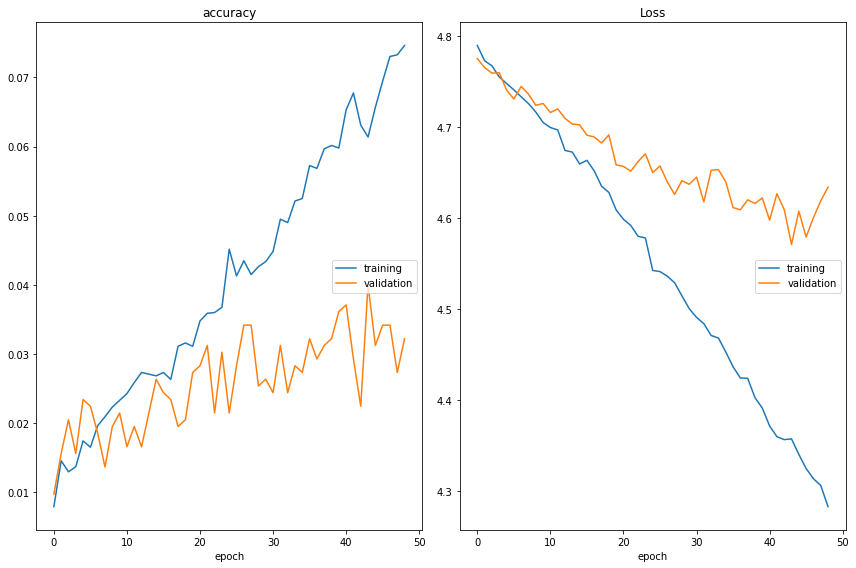

accuracy
	training         	 (min:    0.008, max:    0.075, cur:    0.075)
	validation       	 (min:    0.010, max:    0.040, cur:    0.032)
Loss
	training         	 (min:    4.283, max:    4.790, cur:    4.283)
	validation       	 (min:    4.571, max:    4.775, cur:    4.634)
Restoring model weights from the end of the best epoch: 44.
256/256 [==============================] - 32s 123ms/step - loss: 4.2831 - accuracy: 0.0746 - val_loss: 4.6342 - val_accuracy: 0.0322
Epoch 49: early stopping


In [ ]:
import tensorflow as tf

baseline.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = baseline.fit(train_generator,
                       steps_per_epoch = train_size // batch_size,
                       epochs=epochs,
                       validation_data=val_generator,
                       validation_steps = val_size // batch_size,
                       callbacks=[checkpoint_cb, plot_loss_cb, early_stopping_cb])

### Observation : 

The baseline shows globally poor performances (around 3% of accuracy on the validation set) but is improving during its training. 

On the learning curves, we can clearly see that it is overfitting the training set.

# Effects of preprocessing :

Assessing the effects of preprocessing steps :

### 1- Resize step only (mandatory): 

In [ ]:
## Preprocessing transformator creation :

from sklearn.base import BaseEstimator, TransformerMixin

class ResizeOnly(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, path, y=None):
        import PIL
        from PIL import Image
        
        return self
    
    def transform(self, path, resize_width=128, resize_height=128):
        # Loading image :
        img = Image.open(path)
        # Resize :
        img = img.resize((resize_width, resize_height))
        
        return img

In [ ]:
### Preprocessing all images with these preparation steps and saving them in a new folder :

# Creatinng new folder :
SAVE_FOLDER_PATH_2 = os.path.join(DATA_PATH, 'Resized_only_images_2')
os.makedirs(SAVE_FOLDER_PATH_2, exist_ok=True)

# Processing images and saving them 

breed_counter = 0

for breed_name in os.listdir(IMAGE_FOLDER_PATH):
  
  # Getting breed paths ready and create new subfolder :
  breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_name)
  breed_path_new = os.path.join(SAVE_FOLDER_PATH_2, breed_name)
  os.makedirs(breed_path_new, exist_ok=True)

  # Getting images, preprocess them and save them in the new folder :
  for image_name in os.listdir(breed_path_original):

    # Getting image :
    image_path_original = os.path.join(breed_path_original, image_name)
    
    # Preprocessing steps :
    resize_preprocessor = ResizeOnly()
    preprocessed_img = resize_preprocessor.fit_transform(image_path_original)

    # Convert to "RGB" mode (needed to save) :
    preprocessed_img = preprocessed_img.convert("RGB")

    # Saving in the new subfolder :
    os.chdir(breed_path_new)
    preprocessed_img.save(image_name +'.jpg')

  breed_counter+=1

  print(breed_counter, " breeds already preprocessed and saved.")

1  breeds already preprocessed and saved.
2  breeds already preprocessed and saved.
3  breeds already preprocessed and saved.
4  breeds already preprocessed and saved.
5  breeds already preprocessed and saved.
6  breeds already preprocessed and saved.
7  breeds already preprocessed and saved.
8  breeds already preprocessed and saved.
9  breeds already preprocessed and saved.
10  breeds already preprocessed and saved.
11  breeds already preprocessed and saved.
12  breeds already preprocessed and saved.
13  breeds already preprocessed and saved.
14  breeds already preprocessed and saved.
15  breeds already preprocessed and saved.
16  breeds already preprocessed and saved.
17  breeds already preprocessed and saved.
18  breeds already preprocessed and saved.
19  breeds already preprocessed and saved.
20  breeds already preprocessed and saved.
21  breeds already preprocessed and saved.
22  breeds already preprocessed and saved.
23  breeds already preprocessed and saved.
24  breeds already p

In [ ]:
### Splitting preprocessed data into train_set, validation_set and test_set ; and saving them all :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :

SPLITTED_PATH_2 = os.path.join(DATA_PATH, "splitted__resize")
os.makedirs(SPLITTED_PATH_2, exist_ok=True)

TRAIN_PATH_2 = os.path.join(SPLITTED_PATH_2, 'train_resize')
os.makedirs(TRAIN_PATH_2, exist_ok=True)

TEST_PATH_2 = os.path.join(SPLITTED_PATH_2, 'test_resize')
os.makedirs(TRAIN_PATH_2, exist_ok=True)

VALIDATION_PATH_2 = os.path.join(SPLITTED_PATH_2, 'validation_resize')
os.makedirs(VALIDATION_PATH_2, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(SAVE_FOLDER_PATH_2): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(SAVE_FOLDER_PATH_2, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH_2, breed_folder)
    breed_path_test = os.path.join(TEST_PATH_2, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH_2, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
### Batch generation :

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) # normalization of pixels

train_generator_2 = datagen.flow_from_directory(TRAIN_PATH_2,
                                              batch_size=32,
                                              target_size=(128, 128), # already done by the preprocessor
                                              class_mode="categorical") 
                                              # classes are automatically inferred from the subdirectory structure

val_generator_2 = datagen.flow_from_directory(VALIDATION_PATH_2,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
### Re-creation of the baseline model :

import keras

baseline_2 = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                          input_shape=[128,128,3],
                                                          kernel_size=3, # filters 3x3
                                                          activation='relu',
                                                          padding="SAME"),
                                      keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dense(120, activation = 'softmax')])

baseline_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16777344  
                                                                 
 dense_5 (Dense)             (None, 120)               15480     
                                                                 
Total params: 16,793,720
Trainable params: 16,793,720
Non-trainable params: 0
__________________________________________

In [ ]:
### Callbacks :

FILE_PATH = MODELS_PATH + "/resize_only.h5"


checkpoint_cb_resize = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                       monitor='val_accuracy',
                                                       verbose=1,
                                                       save_best_only=True,
                                                       mode='max')

early_stopping_cb_resize = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         patience=5,
                                                         mode='auto',
                                                         verbose=1,
                                                         restore_best_weights=True)

from livelossplot import PlotLossesKeras
plot_loss_cb_resize = PlotLossesKeras()

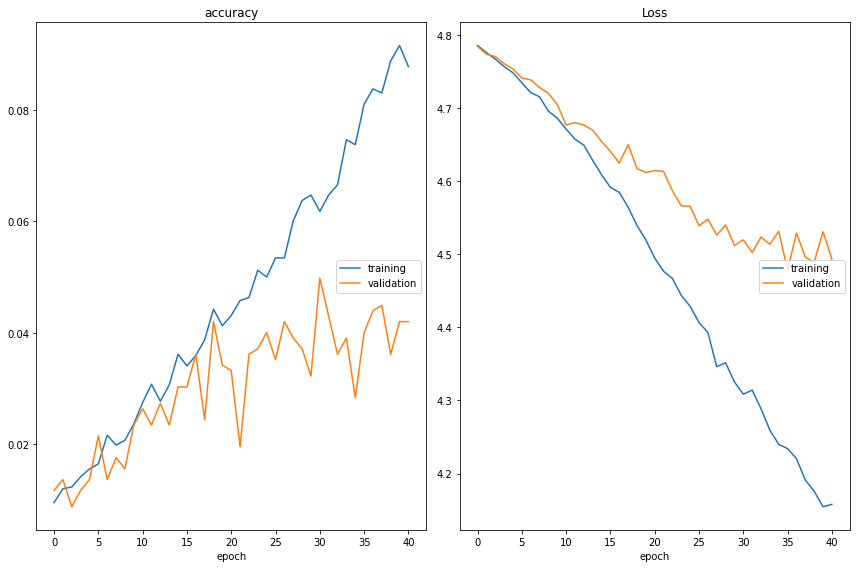

accuracy
	training         	 (min:    0.010, max:    0.092, cur:    0.088)
	validation       	 (min:    0.009, max:    0.050, cur:    0.042)
Loss
	training         	 (min:    4.155, max:    4.786, cur:    4.158)
	validation       	 (min:    4.478, max:    4.784, cur:    4.493)
Restoring model weights from the end of the best epoch: 36.
256/256 [==============================] - 8s 31ms/step - loss: 4.1579 - accuracy: 0.0877 - val_loss: 4.4932 - val_accuracy: 0.0420
Epoch 41: early stopping


In [ ]:
### Training :

import tensorflow as tf

baseline_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = baseline_2.fit(train_generator_2,
                         steps_per_epoch = train_size // batch_size,
                         epochs=epochs,
                         validation_data=val_generator_2,
                         validation_steps = val_size // batch_size,
                         callbacks=[checkpoint_cb_resize, plot_loss_cb_resize, early_stopping_cb_resize])

### Observation 

The results are no different without the autocontrast and equalizing steps.

## Testing another size of image :

In [ ]:
## Preprocessing transformator creation :

from sklearn.base import BaseEstimator, TransformerMixin

class ResizeOnly2(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, path, y=None):
        import PIL
        from PIL import Image
        
        return self
    
    def transform(self, path, resize_width=256, resize_height=256):
        # Loading image :
        img = Image.open(path)
        # Resize :
        img = img.resize((resize_width, resize_height))
        
        return img

In [ ]:
### Preprocessing all images with these preparation steps and saving them in a new folder :

# Creating new folder :
SAVE_FOLDER_PATH_3 = os.path.join(DATA_PATH, 'Resized_only_images_3')
os.makedirs(SAVE_FOLDER_PATH_3, exist_ok=True)

# Processing images and saving them 

breed_counter = 0

for breed_name in os.listdir(IMAGE_FOLDER_PATH):
  
  # Getting breed paths ready and create new subfolder :
  breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_name)
  breed_path_new = os.path.join(SAVE_FOLDER_PATH_3, breed_name)
  os.makedirs(breed_path_new, exist_ok=True)

  # Getting images, preprocess them and save them in the new folder :
  for image_name in os.listdir(breed_path_original):

    # Getting image :
    image_path_original = os.path.join(breed_path_original, image_name)
    
    # Preprocessing steps :
    resize_preprocessor = ResizeOnly2()
    preprocessed_img = resize_preprocessor.fit_transform(image_path_original)

    # Convert to "RGB" mode (needed to save) :
    preprocessed_img = preprocessed_img.convert("RGB")

    # Saving in the new subfolder :
    os.chdir(breed_path_new)
    preprocessed_img.save(image_name +'.jpg')

  breed_counter+=1

  print(breed_counter, " breeds already preprocessed and saved.")

1  breeds already preprocessed and saved.
2  breeds already preprocessed and saved.
3  breeds already preprocessed and saved.
4  breeds already preprocessed and saved.
5  breeds already preprocessed and saved.
6  breeds already preprocessed and saved.
7  breeds already preprocessed and saved.
8  breeds already preprocessed and saved.
9  breeds already preprocessed and saved.
10  breeds already preprocessed and saved.
11  breeds already preprocessed and saved.
12  breeds already preprocessed and saved.
13  breeds already preprocessed and saved.
14  breeds already preprocessed and saved.
15  breeds already preprocessed and saved.
16  breeds already preprocessed and saved.
17  breeds already preprocessed and saved.
18  breeds already preprocessed and saved.
19  breeds already preprocessed and saved.
20  breeds already preprocessed and saved.
21  breeds already preprocessed and saved.
22  breeds already preprocessed and saved.
23  breeds already preprocessed and saved.
24  breeds already p

In [ ]:
### Splitting preprocessed data into train_set, validation_set and test_set ; and saving them all :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :

SPLITTED_PATH_3 = os.path.join(DATA_PATH, "splitted__resize_3")
os.makedirs(SPLITTED_PATH_3, exist_ok=True)

TRAIN_PATH_3 = os.path.join(SPLITTED_PATH_3, 'train_resize_3')
os.makedirs(TRAIN_PATH_3, exist_ok=True)

TEST_PATH_3 = os.path.join(SPLITTED_PATH_3, 'test_resize_3')
os.makedirs(TRAIN_PATH_3, exist_ok=True)

VALIDATION_PATH_3 = os.path.join(SPLITTED_PATH_3, 'validation_resize_3')
os.makedirs(VALIDATION_PATH_3, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(SAVE_FOLDER_PATH_3): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(SAVE_FOLDER_PATH_3, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH_3, breed_folder)
    breed_path_test = os.path.join(TEST_PATH_3, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH_3, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
### Batch generation :

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) # normalization of pixels

train_generator_3 = datagen.flow_from_directory(TRAIN_PATH_2,
                                                batch_size=32,
                                                target_size=(256, 256), # already done by the preprocessor
                                                class_mode="categorical") 
                                                # classes are automatically inferred from the subdirectory structure

val_generator_3 = datagen.flow_from_directory(VALIDATION_PATH_2,
                                              batch_size=32,
                                              target_size=(256, 256),
                                              class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
### Re-creation of the baseline model :


baseline_3 = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                          input_shape=[256,256,3],
                                                          kernel_size=3, # filters 3x3
                                                          activation='relu',
                                                          padding="SAME"),
                                      keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dense(120, activation = 'softmax')])

baseline_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 524288)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               67108992  
                                                                 
 dense_7 (Dense)             (None, 120)               15480     
                                                                 
Total params: 67,125,368
Trainable params: 67,125,368
Non-trainable params: 0
__________________________________________

In [ ]:
### Callbacks :

FILE_PATH = MODELS_PATH + "/resize_only_256.h5"


checkpoint_cb_resize_3 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                       monitor='val_accuracy',
                                                       verbose=1,
                                                       save_best_only=True,
                                                       mode='max')

early_stopping_cb_resize_3 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=7,
                                                          mode='auto',
                                                          verbose=1,
                                                          restore_best_weights=True)

from livelossplot import PlotLossesKeras
plot_loss_cb_resize_3 = PlotLossesKeras()

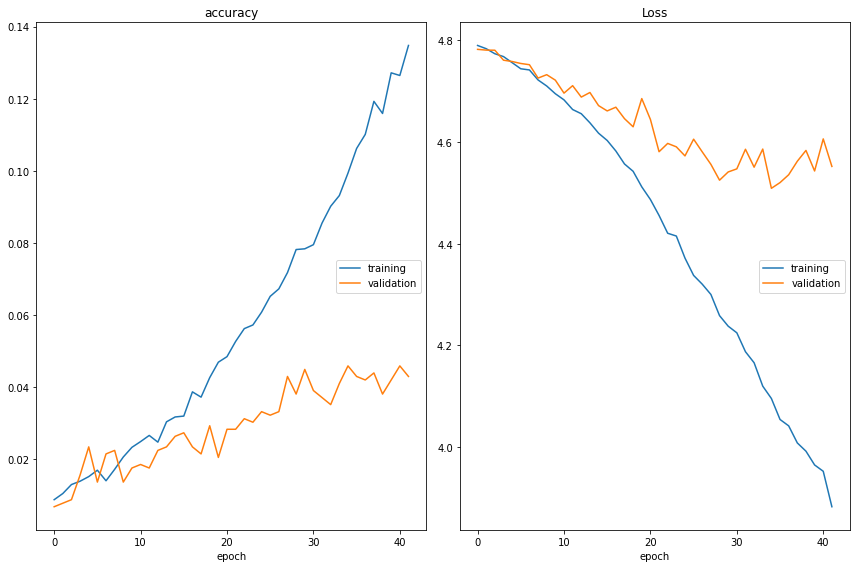

accuracy
	training         	 (min:    0.009, max:    0.135, cur:    0.135)
	validation       	 (min:    0.007, max:    0.046, cur:    0.043)
Loss
	training         	 (min:    3.883, max:    4.790, cur:    3.883)
	validation       	 (min:    4.509, max:    4.782, cur:    4.552)
Restoring model weights from the end of the best epoch: 35.
256/256 [==============================] - 17s 67ms/step - loss: 3.8828 - accuracy: 0.1348 - val_loss: 4.5520 - val_accuracy: 0.0430
Epoch 42: early stopping


In [ ]:
### Training :

import tensorflow as tf

baseline_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = baseline_3.fit(train_generator_3,
                         steps_per_epoch = train_size // batch_size,
                         epochs=epochs,
                         validation_data=val_generator_3,
                         validation_steps = val_size // batch_size,
                         callbacks=[checkpoint_cb_resize_3, plot_loss_cb_resize_3, early_stopping_cb_resize_3])

### Observation :

As before, increasing the size of image (giving more information to the network) didn't result in better performances.

# Hyperparameter exploration (on preprocessed images, with the complete transformator): 

In the next steps, we are going to try different changes on the hyperparameters of this baseline and assess their effect on the training process and the final performances.

## - Iteration 1 : Dropout 

As the baseline is overfitting the training set, we will try to deal with this particular issue by using a "Drop out" layer, forcing the network to be more robust :

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/improved_baseline_1.h5"


checkpoint_cb_dropout = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                        monitor='val_accuracy',
                                                        verbose=1,
                                                        save_best_only=True,
                                                        mode='max')
plot_loss_cb_dropout = PlotLossesKeras()

early_stopping_cb_dropout = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=8,
                                                          mode='auto',
                                                          verbose=1,
                                                          restore_best_weights=True)

In [ ]:
# Creating model :

dropout_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                             input_shape=[128,128,3],
                                                             kernel_size=3, # filters 3x3
                                                             activation='relu',
                                                             padding="SAME"),
                                         keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(128, activation='relu'),
                                         keras.layers.Dropout(0.2), # 20% of neurons are randomly dropped on each epoch 
                                         keras.layers.Dense(120, activation = 'softmax')])

dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 120)               15480     
                                                      

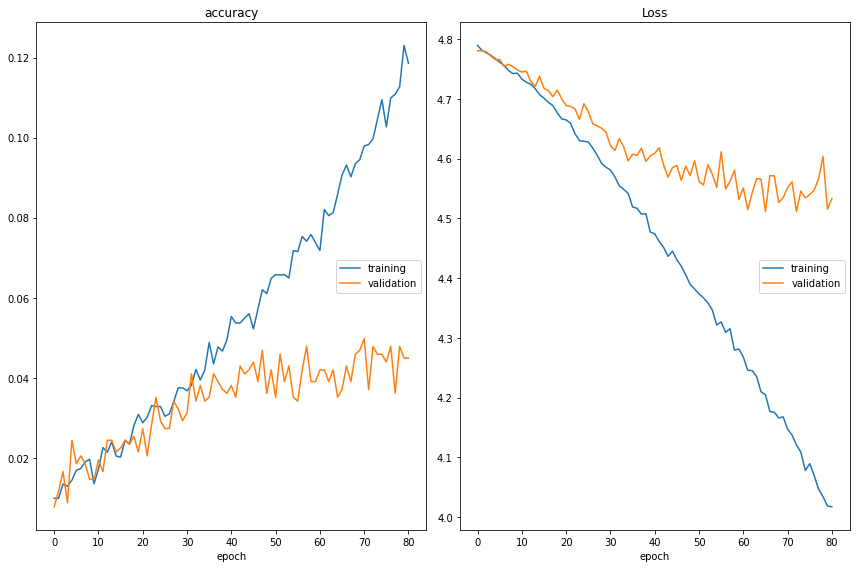

accuracy
	training         	 (min:    0.010, max:    0.123, cur:    0.119)
	validation       	 (min:    0.008, max:    0.050, cur:    0.045)
Loss
	training         	 (min:    4.017, max:    4.789, cur:    4.017)
	validation       	 (min:    4.511, max:    4.781, cur:    4.533)
Restoring model weights from the end of the best epoch: 73.
256/256 [==============================] - 32s 126ms/step - loss: 4.0174 - accuracy: 0.1185 - val_loss: 4.5333 - val_accuracy: 0.0449
Epoch 81: early stopping


In [ ]:
# Training the model :

dropout_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = dropout_model.fit(train_generator,
                            steps_per_epoch = train_size // batch_size,
                            epochs=epochs,
                            validation_data=val_generator,
                            validation_steps = val_size // batch_size,
                            callbacks=[checkpoint_cb_dropout,
                                       plot_loss_cb_dropout, 
                                       early_stopping_cb_dropout])

### Observations :

With the dropout, the model made more time to get its learning curves diverge and reach a few better performance (4,5% of accuracy on the validation set) but there still is overfitting.

## - Iteration 2 : MaxPooling : changing Pool size

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/pool_size.h5"


checkpoint_cb_pool_size = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                        monitor='val_accuracy',
                                                        verbose=1,
                                                        save_best_only=True,
                                                        mode='max')
plot_loss_cb_pool_size= PlotLossesKeras()

early_stopping_cb_pool_size = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=7,
                                                            mode='auto',
                                                            verbose=1,
                                                            restore_best_weights=True)

In [ ]:
# Creating model :

pool_size_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                             input_shape=[128,128,3],
                                                             kernel_size=3, # filters 3x3
                                                             activation='relu',
                                                             padding="SAME"),
                                         keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(128, activation='relu'),
                                         keras.layers.Dropout(0.2), # 20% of neurons are randomly dropped on each epoch 
                                         keras.layers.Dense(120, activation = 'softmax')])

pool_size_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 123008)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               15745152  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 120)               15480     
                                                      

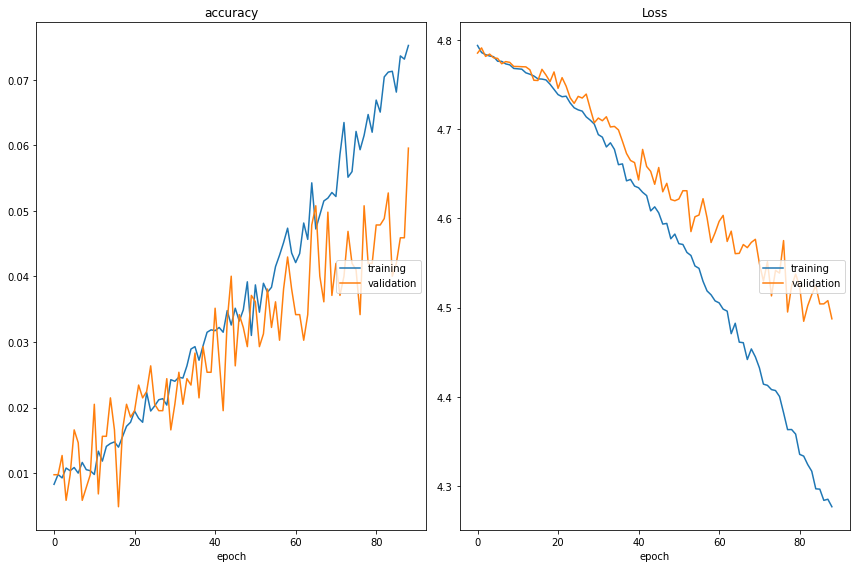

accuracy
	training         	 (min:    0.008, max:    0.075, cur:    0.075)
	validation       	 (min:    0.005, max:    0.060, cur:    0.060)
Loss
	training         	 (min:    4.277, max:    4.794, cur:    4.277)
	validation       	 (min:    4.485, max:    4.791, cur:    4.487)
Restoring model weights from the end of the best epoch: 82.
256/256 [==============================] - 34s 135ms/step - loss: 4.2769 - accuracy: 0.0752 - val_loss: 4.4875 - val_accuracy: 0.0596
Epoch 89: early stopping


In [ ]:
# Training the model :

pool_size_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = pool_size_model.fit(train_generator,
                              steps_per_epoch = train_size // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps = val_size // batch_size,
                              callbacks=[checkpoint_cb_pool_size,
                                         plot_loss_cb_pool_size,
                                         early_stopping_cb_pool_size])

## - Iteration 3 : Maxpooling stride 



In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/pool_stride.h5"


checkpoint_cb_pool_stride = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                        monitor='val_accuracy',
                                                        verbose=1,
                                                        save_best_only=True,
                                                        mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_pool_stride= PlotLossesKeras()

early_stopping_cb_pool_stride = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=7,
                                                              mode='auto',
                                                              verbose=1,
                                                              restore_best_weights=True)

In [ ]:
# Creating model :

pool_stride_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                 input_shape=[128,128,3],
                                                                 kernel_size=3, # filters 3x3
                                                                 activation='relu',
                                                                 padding="SAME"),
                                             keras.layers.MaxPooling2D(pool_size=(6,6), strides=(4,4)),
                                             keras.layers.Flatten(),
                                             keras.layers.Dense(128, activation='relu'),
                                             keras.layers.Dropout(0.2), # 20% of neurons are randomly dropped on each epoch 
                                             keras.layers.Dense(120, activation = 'softmax')])

pool_stride_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3936384   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 120)               15480     
                                                      

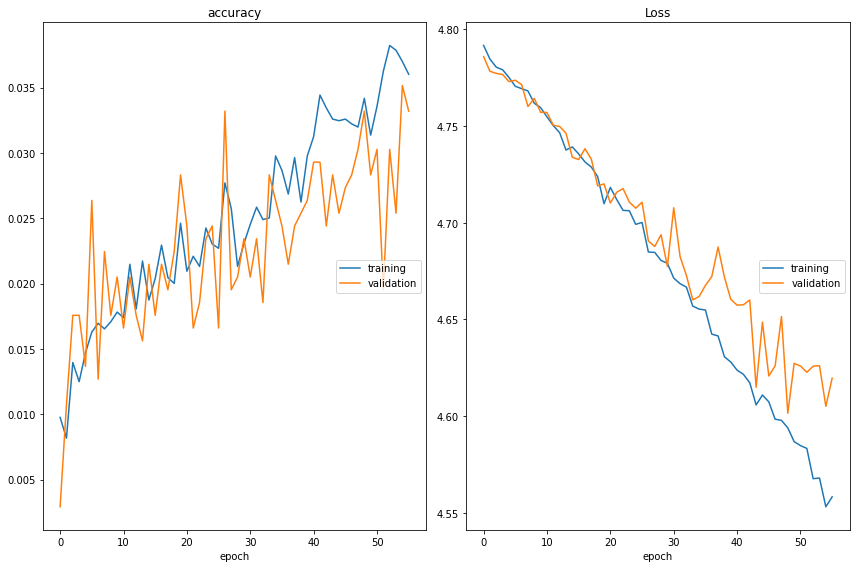

accuracy
	training         	 (min:    0.008, max:    0.038, cur:    0.036)
	validation       	 (min:    0.003, max:    0.035, cur:    0.033)
Loss
	training         	 (min:    4.553, max:    4.792, cur:    4.558)
	validation       	 (min:    4.602, max:    4.786, cur:    4.620)
Restoring model weights from the end of the best epoch: 49.
256/256 [==============================] - 32s 124ms/step - loss: 4.5583 - accuracy: 0.0360 - val_loss: 4.6197 - val_accuracy: 0.0332
Epoch 56: early stopping


In [ ]:
# Training the model :

pool_stride_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = pool_stride_model.fit(train_generator,
                              steps_per_epoch = train_size // batch_size,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps = val_size // batch_size,
                              callbacks=[checkpoint_cb_pool_stride,
                                         plot_loss_cb_pool_stride,
                                         early_stopping_cb_pool_stride])

### Observation 


## - Iteration 4 : Filter size 



In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/filter_size.h5"


checkpoint_cb_filter_size = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                            monitor='val_accuracy',
                                                            verbose=1,
                                                            save_best_only=True,
                                                            mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_filter_size= PlotLossesKeras()

early_stopping_cb_filter_size = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=7,
                                                              mode='auto',
                                                              verbose=1,
                                                              restore_best_weights=True)

In [ ]:
# Creating model :

filter_size_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                 input_shape=[128,128,3],
                                                                 kernel_size=9, # filters 9x9
                                                                 activation='relu',
                                                                 padding="SAME"),
                                             keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                             keras.layers.Flatten(),
                                             keras.layers.Dense(128, activation='relu'),
                                             keras.layers.Dropout(0.2), # 20% of neurons are randomly dropped on each epoch 
                                             keras.layers.Dense(120, activation = 'softmax')])

filter_size_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      7808      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 120)               15480     
                                                      

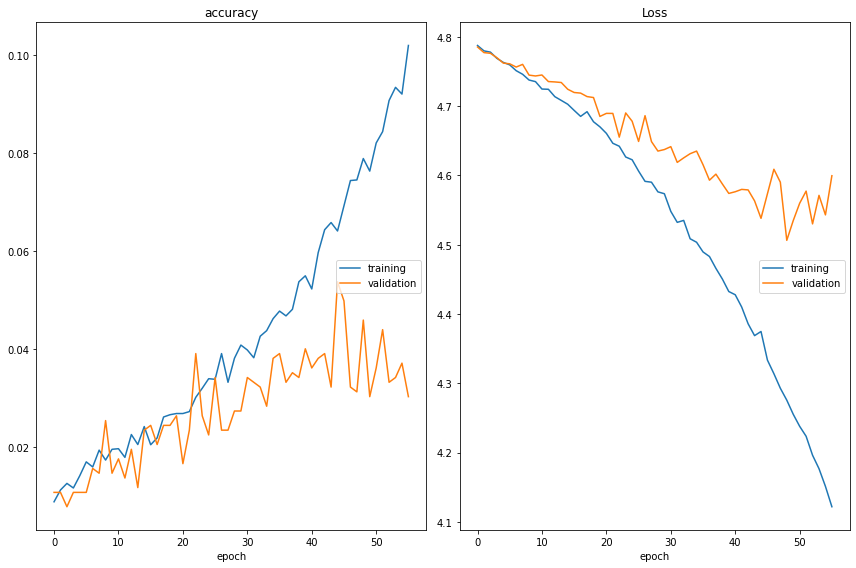

accuracy
	training         	 (min:    0.009, max:    0.102, cur:    0.102)
	validation       	 (min:    0.008, max:    0.054, cur:    0.030)
Loss
	training         	 (min:    4.122, max:    4.788, cur:    4.122)
	validation       	 (min:    4.506, max:    4.785, cur:    4.600)
Restoring model weights from the end of the best epoch: 49.
256/256 [==============================] - 32s 127ms/step - loss: 4.1218 - accuracy: 0.1019 - val_loss: 4.5996 - val_accuracy: 0.0303
Epoch 56: early stopping


In [ ]:
# Training the model :

filter_size_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = filter_size_model.fit(train_generator,
                                steps_per_epoch = train_size // batch_size,
                                epochs=epochs,
                                validation_data=val_generator,
                                validation_steps = val_size // batch_size,
                                callbacks=[checkpoint_cb_filter_size,
                                           plot_loss_cb_filter_size,
                                           early_stopping_cb_filter_size])

### Observation :

Using bigger filters did not show particularly different performances. It ended by diverging as well and reaching a similar performance (5,4% of accuracy on the validation set).

## - Iteration 5 : Number of filters

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/nb_filters.h5"


checkpoint_cb_nb_filters = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                           monitor='val_accuracy',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_nb_filters = PlotLossesKeras()

early_stopping_cb_nb_filters = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                             patience=7,
                                                             mode='auto',
                                                             verbose=1,
                                                             restore_best_weights=True)

In [ ]:
# Creating model :

nb_filters_model = keras.models.Sequential([keras.layers.Conv2D(filters=128, # 4x more filters than the baseline
                                                                input_shape=[128,128,3],
                                                                kernel_size=3, # filters 3x3
                                                                activation='relu',
                                                                padding="SAME"),
                                             keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                             keras.layers.Flatten(),
                                             keras.layers.Dense(128, activation='relu'),
                                             keras.layers.Dropout(0.33), 
                                             # 33% of neurons are randomly dropped on each epoch
                                             # to limit the increase in learning delay
                                             keras.layers.Dense(120, activation = 'softmax')])

nb_filters_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 524288)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               67108992  
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 120)               15480     
                                                     

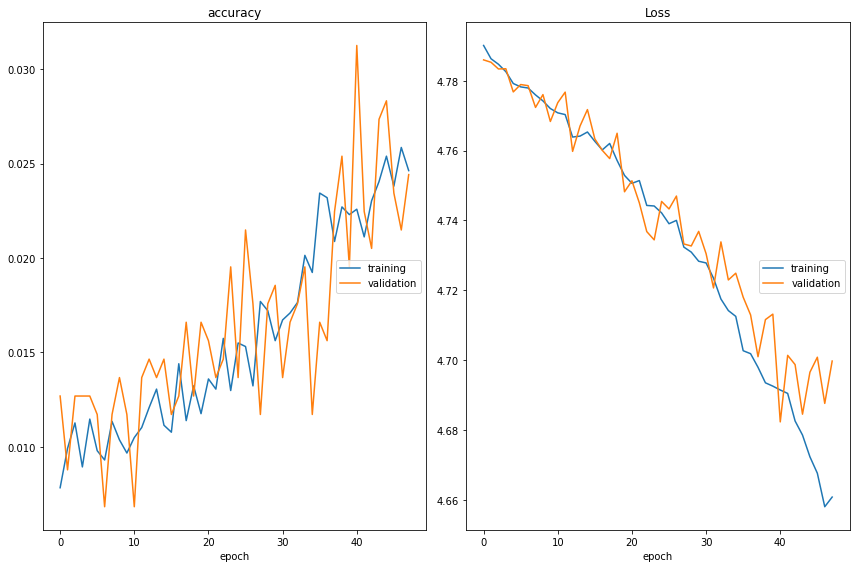

accuracy
	training         	 (min:    0.008, max:    0.026, cur:    0.025)
	validation       	 (min:    0.007, max:    0.031, cur:    0.024)
Loss
	training         	 (min:    4.658, max:    4.790, cur:    4.661)
	validation       	 (min:    4.682, max:    4.786, cur:    4.700)
Restoring model weights from the end of the best epoch: 41.
256/256 [==============================] - 34s 132ms/step - loss: 4.6608 - accuracy: 0.0246 - val_loss: 4.6997 - val_accuracy: 0.0244
Epoch 48: early stopping


In [ ]:
# Training the model :

nb_filters_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = nb_filters_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_nb_filters,
                                           plot_loss_cb_nb_filters,
                                           early_stopping_cb_nb_filters])

### Observation :

Using 4 times more filters in the same convolutional layer didn't allow the model to perform better. 
As expected, it also learned at a lower 'speed' because of the dropout.

## - Iteration 6 : Activation function

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/activation.h5"


checkpoint_cb_activation = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                           monitor='val_accuracy',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_activation = PlotLossesKeras()

early_stopping_cb_activation = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                             patience=7,
                                                             mode='auto',
                                                             verbose=1,
                                                             restore_best_weights=True)

In [ ]:
# Creating model :

activation_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                input_shape=[128,128,3],
                                                                kernel_size=3, # filters 3x3
                                                                activation='tanh',
                                                                padding="SAME"),
                                             keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                             keras.layers.Flatten(),
                                             keras.layers.Dense(128, activation='relu'),
                                             keras.layers.Dense(120, activation = 'softmax')])

activation_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 131072)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               16777344  
                                                                 
 dense_23 (Dense)            (None, 120)               15480     
                                                                 
Total params: 16,793,720
Trainable params: 16,793,720
Non-trainable params: 0
_________________________________________

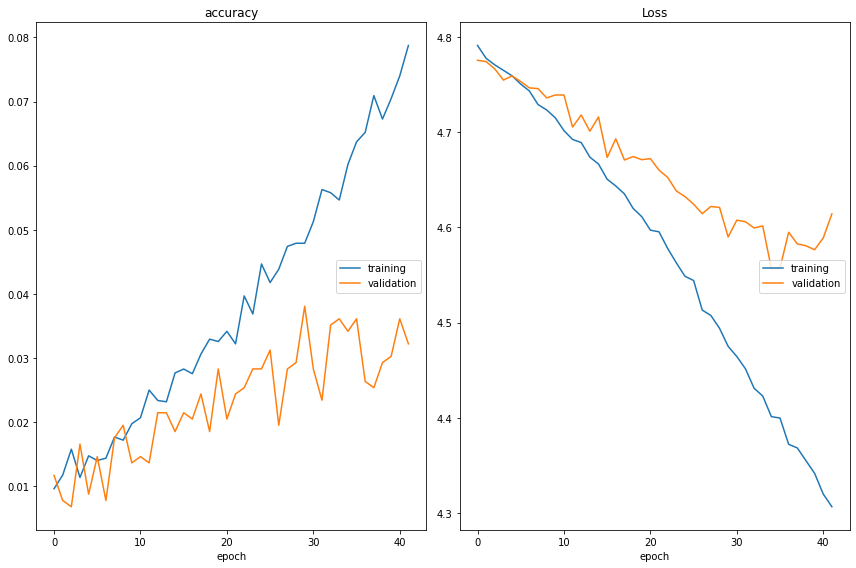

accuracy
	training         	 (min:    0.010, max:    0.079, cur:    0.079)
	validation       	 (min:    0.007, max:    0.038, cur:    0.032)
Loss
	training         	 (min:    4.307, max:    4.791, cur:    4.307)
	validation       	 (min:    4.557, max:    4.776, cur:    4.614)
Restoring model weights from the end of the best epoch: 35.
256/256 [==============================] - 32s 126ms/step - loss: 4.3066 - accuracy: 0.0787 - val_loss: 4.6142 - val_accuracy: 0.0322
Epoch 42: early stopping


In [ ]:
# Training the model :

activation_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = activation_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_activation,
                                           plot_loss_cb_activation,
                                           early_stopping_cb_activation])

## - Iteration 7 : optimizer 

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/optimizer.h5"


checkpoint_cb_optimizer = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                          monitor='val_accuracy',
                                                          verbose=1,
                                                          save_best_only=True,
                                                          mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_optimizer = PlotLossesKeras()

early_stopping_cb_optimizer = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=7,
                                                            mode='auto',
                                                            verbose=1,
                                                            restore_best_weights=True)

In [ ]:
# Creating model :

optimizer_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                               input_shape=[128,128,3],
                                                               kernel_size=3, # filters 3x3
                                                               activation='relu',
                                                               padding="SAME"),
                                           keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                           keras.layers.Flatten(),
                                           keras.layers.Dense(128, activation='relu'),
                                           keras.layers.Dense(120, activation = 'softmax')])

optimizer_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 131072)            0         
                                                                 
 dense_32 (Dense)            (None, 128)               16777344  
                                                                 
 dense_33 (Dense)            (None, 120)               15480     
                                                                 
Total params: 16,793,720
Trainable params: 16,793,720
Non-trainable params: 0
_________________________________________

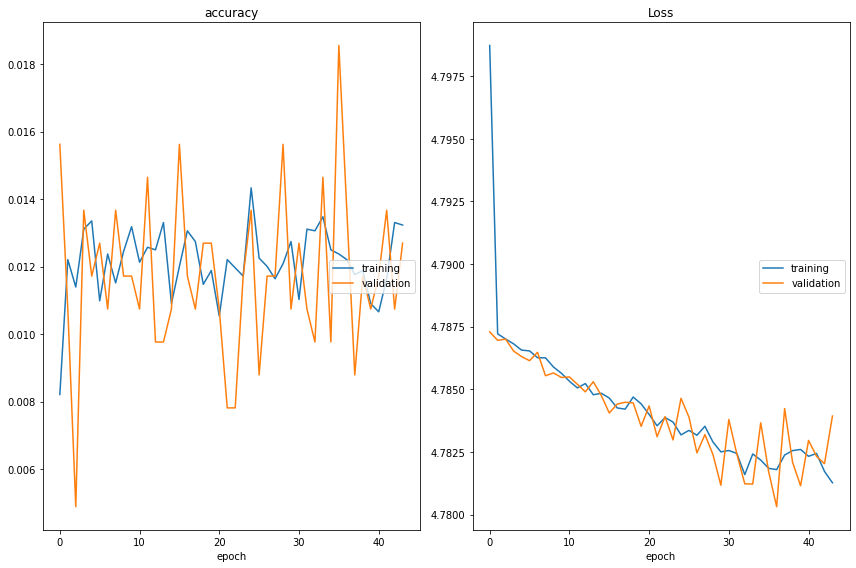

accuracy
	training         	 (min:    0.008, max:    0.014, cur:    0.013)
	validation       	 (min:    0.005, max:    0.019, cur:    0.013)
Loss
	training         	 (min:    4.781, max:    4.799, cur:    4.781)
	validation       	 (min:    4.780, max:    4.787, cur:    4.784)
Restoring model weights from the end of the best epoch: 37.
256/256 [==============================] - 31s 122ms/step - loss: 4.7813 - accuracy: 0.0132 - val_loss: 4.7839 - val_accuracy: 0.0127
Epoch 44: early stopping


In [ ]:
# Training the model :

optimizer_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = optimizer_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_optimizer,
                                           plot_loss_cb_optimizer,
                                           early_stopping_cb_optimizer])

### Observation :

No improvement are revealed using an Adam optimizer. This optimizer performs less better than the stochastic gradient descent we used in the baseline, with difficulties to converge even after tuning the learning rate.

## Iteration 8 : Number of neurons ('Width' of the network) 

As the iterations we made above did not significantly improve our baseline, we are going to complexify it, by transforming its architecture. 

First, we are going to increase its 'width' by increasing the number of neurons in the dense layer, after the MaxPooling layer :


In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/nb_neurons.h5"


checkpoint_cb_nb_neurons = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                                    monitor='val_accuracy',
                                                                    verbose=1,
                                                                    save_best_only=True,
                                                                    mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_nb_neurons = PlotLossesKeras()

early_stopping_cb_nb_neurons = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                             patience=7,
                                                             mode='auto',
                                                             verbose=1,
                                                             restore_best_weights=True)


In [ ]:
# Creating model :

nb_neurons_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                input_shape=[128,128,3],
                                                                kernel_size=3, # filters 3x3
                                                                activation='relu',
                                                                padding="SAME"),
                                             keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                             keras.layers.Flatten(),
                                             keras.layers.Dense(256, activation='relu'), # 2x times more neurons than baseline
                                             keras.layers.Dropout(0.2), # to limit increasing delay of learning
                                             keras.layers.Dense(120, activation = 'softmax')])

nb_neurons_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 131072)            0         
                                                                 
 dense_37 (Dense)            (None, 256)               33554688  
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 120)               30840     
                                                     

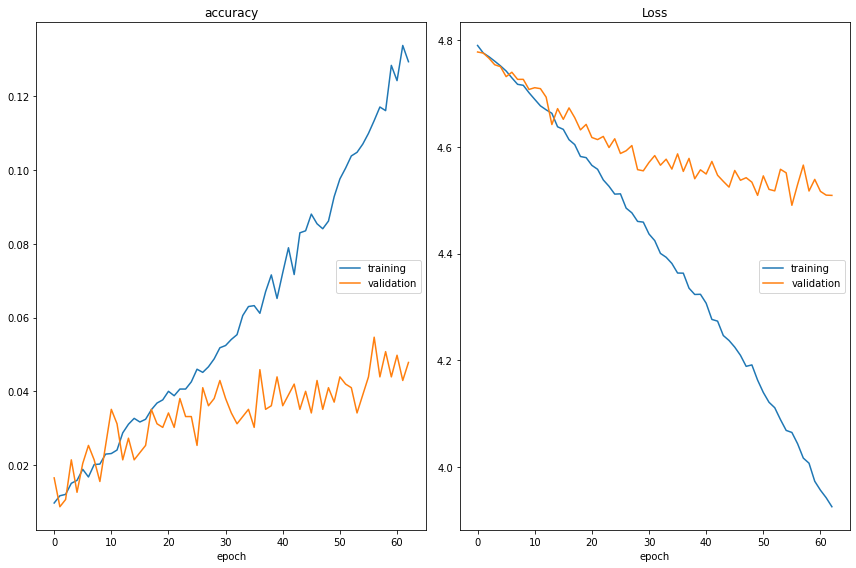

accuracy
	training         	 (min:    0.010, max:    0.134, cur:    0.129)
	validation       	 (min:    0.009, max:    0.055, cur:    0.048)
Loss
	training         	 (min:    3.926, max:    4.790, cur:    3.926)
	validation       	 (min:    4.491, max:    4.778, cur:    4.509)
Restoring model weights from the end of the best epoch: 56.
256/256 [==============================] - 31s 123ms/step - loss: 3.9259 - accuracy: 0.1293 - val_loss: 4.5092 - val_accuracy: 0.0479
Epoch 63: early stopping


In [ ]:
# Training the model :

nb_neurons_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = nb_neurons_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_nb_neurons,
                                           plot_loss_cb_nb_neurons,
                                           early_stopping_cb_nb_neurons])

### Observation 



## - Iteration 9 : Depth of the network 

We are now testing to increase the depth of our model, going from 1 convolutional+MaxPooling layer to 4 convolutional+MaxPooling layers (keeping the same number of filters and others hyperparameters the same) :

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/depth.h5"


checkpoint_cb_depth = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                      monitor='val_accuracy',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_depth = PlotLossesKeras()

early_stopping_cb_depth = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=7,
                                                        mode='auto',
                                                        verbose=1,
                                                        restore_best_weights=True)


In [ ]:
# Model Creation :

depth_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                     input_shape=[128,128,3], 
                                                     kernel_size=3, # filters 3x3
                                                     activation='relu',
                                                     padding="SAME"),
                                       keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                       keras.layers.Conv2D(filters=32,
                                                     input_shape=[128,128,3], 
                                                     kernel_size=3, # filters 3x3
                                                     activation='relu',
                                                     padding="SAME"),
                                       keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                       keras.layers.Conv2D(filters=32,
                                                     input_shape=[128,128,3], 
                                                     kernel_size=3, # filters 3x3
                                                     activation='relu',
                                                     padding="SAME"),
                                       keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                       keras.layers.Conv2D(filters=32,
                                                     input_shape=[128,128,3], 
                                                     kernel_size=3, # filters 3x3
                                                     activation='relu',
                                                     padding="SAME"),
                                       keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                       keras.layers.Flatten(),
                                       keras.layers.Dense(256, activation='relu'), # increasing width from 128 to 256
                                       keras.layers.Dense(120, activation = 'softmax')])

depth_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)     

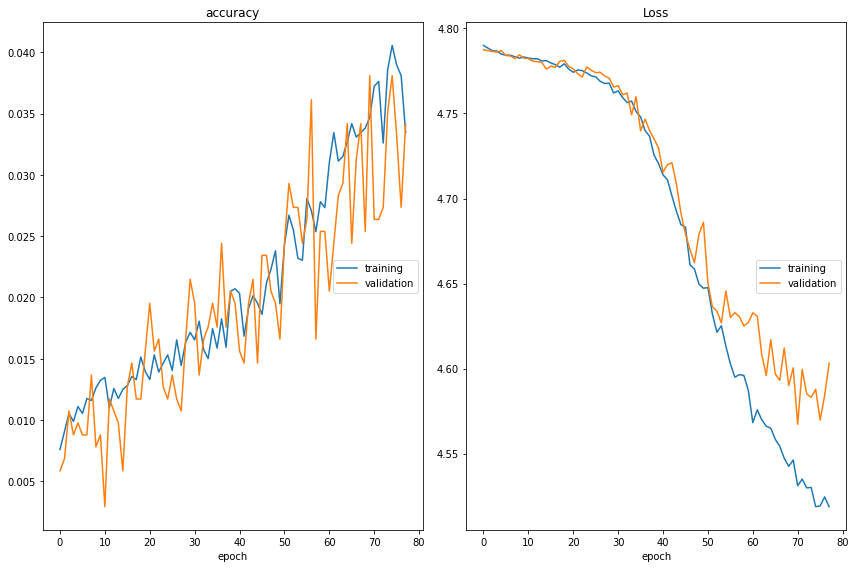

accuracy
	training         	 (min:    0.008, max:    0.041, cur:    0.033)
	validation       	 (min:    0.003, max:    0.038, cur:    0.034)
Loss
	training         	 (min:    4.519, max:    4.790, cur:    4.519)
	validation       	 (min:    4.567, max:    4.787, cur:    4.603)
Restoring model weights from the end of the best epoch: 71.
256/256 [==============================] - 32s 124ms/step - loss: 4.5188 - accuracy: 0.0334 - val_loss: 4.6032 - val_accuracy: 0.0342
Epoch 78: early stopping


In [ ]:
# Training the model :

depth_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = depth_model.fit(train_generator,
                          steps_per_epoch = train_size // batch_size,
                          epochs=epochs,
                          validation_data=val_generator,
                          validation_steps = val_size // batch_size,
                          callbacks=[checkpoint_cb_depth,
                                     plot_loss_cb_depth,
                                     early_stopping_cb_depth])

### Observation :

Increasing the complexity of the model has lowered its trend to overfit the train set. 

However, it doesn't perform better neither. 

## - Iteration 10 : Depth + Adaptation of convolutional layers

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/depth_2.h5"


checkpoint_cb_depth_2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                        monitor='val_accuracy',
                                                        verbose=1,
                                                        save_best_only=True,
                                                        mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_depth_2 = PlotLossesKeras()

early_stopping_cb_depth_2 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=7,
                                                          mode='auto',
                                                          verbose=1,
                                                          restore_best_weights=True)


In [ ]:
# Model Creation : adapting nb of filters, keeping 3 conv. layers and 2 MaxPooling :

depth_2_model = keras.models.Sequential([keras.layers.Conv2D(filters=256,
                                                             input_shape=[128,128,3],
                                                             kernel_size=3, # filters 3x3
                                                             activation='relu',
                                                             padding="SAME"),
                                         keras.layers.Conv2D(filters=128,
                                                             input_shape=[128,128,3],
                                                             kernel_size=3, # filters 3x3
                                                             activation='relu',
                                                             padding="SAME"),
                                         keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                         keras.layers.Conv2D(filters=32,
                                                             input_shape=[128,128,3],
                                                             kernel_size=3, # filters 3x3
                                                             activation='relu',
                                                             padding="SAME"),
                                         keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(128, activation='relu'),
                                         keras.layers.Dense(120, activation = 'softmax')])

depth_2_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 128, 128, 256)     7168      
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 128)     295040    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        36896     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 32768)           

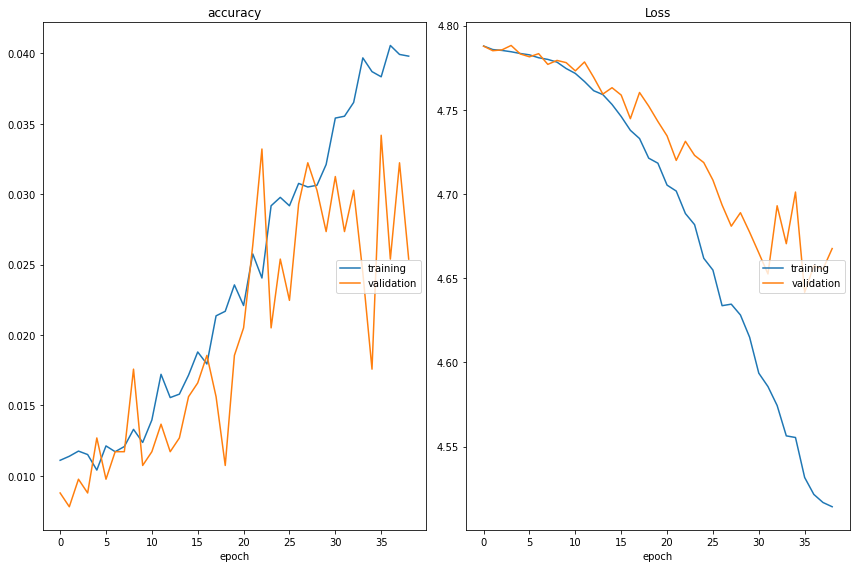

accuracy
	training         	 (min:    0.010, max:    0.041, cur:    0.040)
	validation       	 (min:    0.008, max:    0.034, cur:    0.025)
Loss
	training         	 (min:    4.514, max:    4.788, cur:    4.514)
	validation       	 (min:    4.642, max:    4.788, cur:    4.668)
256/256 [==============================] - 46s 179ms/step - loss: 4.5143 - accuracy: 0.0398 - val_loss: 4.6677 - val_accuracy: 0.0254
Epoch 40/100
241/256 [===========================>..] - ETA: 2s - loss: 4.4972 - accuracy: 0.0451

In [ ]:
# Training the model :

depth_2_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = depth_2_model.fit(train_generator,
                            steps_per_epoch = train_size // batch_size,
                            epochs=epochs,
                            validation_data=val_generator,
                            validation_steps = val_size // batch_size,
                            callbacks=[checkpoint_cb_depth_2,
                                       plot_loss_cb_depth_2,
                                       early_stopping_cb_depth_2])

### Observation 



## - Iteration 11 : Replacing dense layer by a GlobalAveragePooling layer :

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/global_pool.h5"


checkpoint_cb_global_pool = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                            monitor='val_accuracy',
                                                            verbose=1,
                                                            save_best_only=True,
                                                            mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_global_pool = PlotLossesKeras()

early_stopping_cb_global_pool = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=7,
                                                              mode='auto',
                                                              verbose=1,
                                                              restore_best_weights=True)


In [ ]:
# Model Creation : 

global_pool_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                 input_shape=[128,128,3],
                                                                 kernel_size=3, # filters 3x3
                                                                 activation='relu',
                                                                 padding="SAME"),
                                             keras.layers.GlobalAveragePooling2D(),
                                             keras.layers.Dense(120, activation = 'softmax')])

global_pool_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 120)               3960      
                                                                 
Total params: 4,856
Trainable params: 4,856
Non-trainable params: 0
_________________________________________________________________


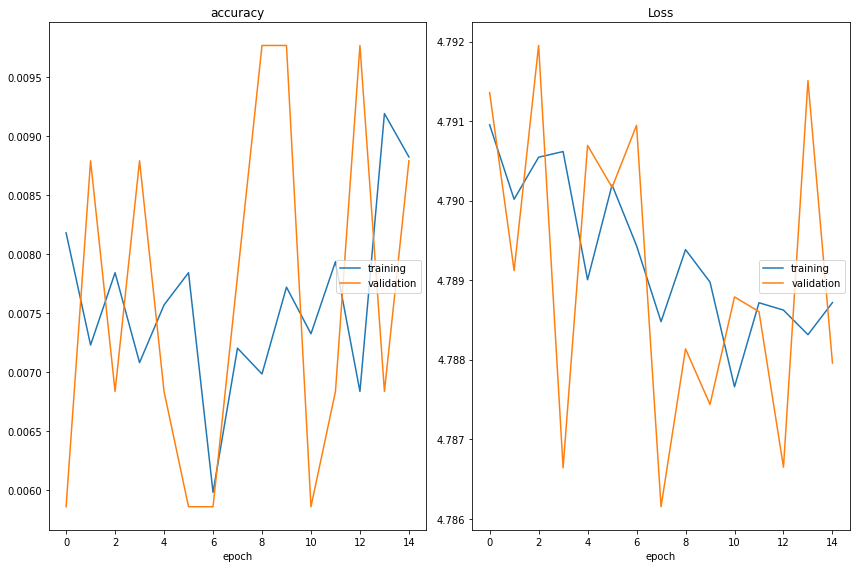

accuracy
	training         	 (min:    0.006, max:    0.009, cur:    0.009)
	validation       	 (min:    0.006, max:    0.010, cur:    0.009)
Loss
	training         	 (min:    4.788, max:    4.791, cur:    4.789)
	validation       	 (min:    4.786, max:    4.792, cur:    4.788)
Restoring model weights from the end of the best epoch: 8.
256/256 [==============================] - 91s 350ms/step - loss: 4.7887 - accuracy: 0.0088 - val_loss: 4.7880 - val_accuracy: 0.0088
Epoch 15: early stopping


In [ ]:
# Training the model :

global_pool_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = global_pool_model.fit(train_generator,
                                steps_per_epoch = train_size // batch_size,
                                epochs=epochs,
                                validation_data=val_generator,
                                validation_steps = val_size // batch_size,
                                callbacks=[checkpoint_cb_global_pool,
                                           plot_loss_cb_global_pool,
                                           early_stopping_cb_global_pool])

### Observation :

On this much lighter model (only 4856 parameters to train instead of several millions on the precedent ones), 

## - Iteration 12 : Adding BatchNormalization layer

As it is usually used, we are going to place a BatchNormalization layer between linear and non-linear layer : after the Conv2D layer (without activation included) and before an Activation layer.

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/global_pool.h5"


checkpoint_cb_batch_norm = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                           monitor='val_accuracy',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_batch_norm = PlotLossesKeras()

early_stopping_cb_batch_norm = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                             patience=7,
                                                             mode='auto',
                                                             verbose=1,
                                                             restore_best_weights=True)


In [ ]:
# Model creation :

batch_norm_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                input_shape=[128,128,3],
                                                                kernel_size=3, # filters 3x3
                                                                padding="SAME"),
                                            keras.layers.BatchNormalization(),
                                            keras.layers.Activation('relu'),
                                            keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                                            keras.layers.Flatten(),
                                            keras.layers.Dense(128, activation='relu'),
                                            keras.layers.Dense(120, activation = 'softmax')])

batch_norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

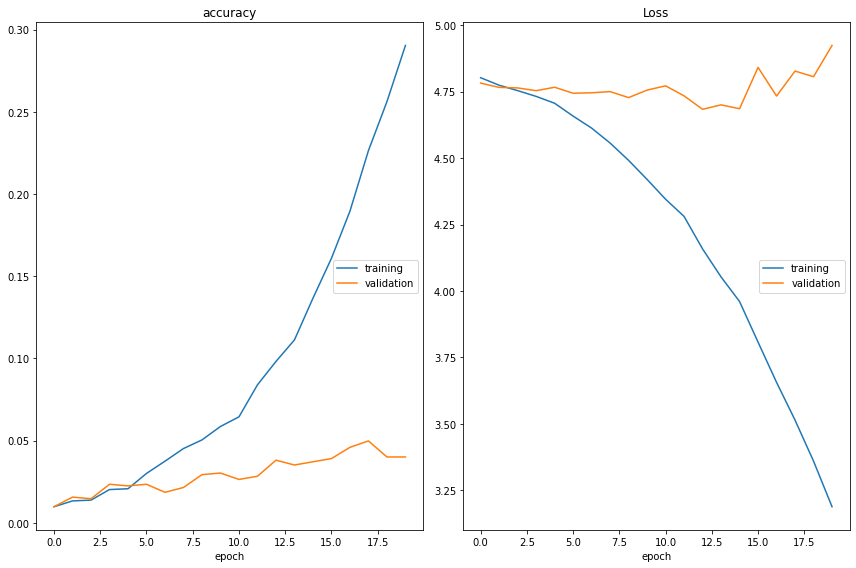

accuracy
	training         	 (min:    0.010, max:    0.290, cur:    0.290)
	validation       	 (min:    0.010, max:    0.050, cur:    0.040)
Loss
	training         	 (min:    3.188, max:    4.803, cur:    3.188)
	validation       	 (min:    4.684, max:    4.924, cur:    4.924)
Restoring model weights from the end of the best epoch: 13.
256/256 [==============================] - 185s 725ms/step - loss: 3.1877 - accuracy: 0.2904 - val_loss: 4.9240 - val_accuracy: 0.0400
Epoch 20: early stopping


In [ ]:
# Training the model :

batch_norm_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = batch_norm_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_batch_norm,
                                          plot_loss_cb_batch_norm,
                                          early_stopping_cb_batch_norm])

### Observation :

With the BatchNormalization & Activation layers, the model overfitted even more than the baseline but reached better performances (5% accuracy on validation set instead of 4%...). 

## - Iteration 13 : combination of the most interesting steps :

- BatchNormalization (+Activation layer)
- Dropout
- Increased width of the network 
- Size of filters in the convolutional layer
- MaxPooling size of the pool 

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/combination_1.h5"


checkpoint_cb_combination_1 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                              monitor='val_accuracy',
                                                              verbose=1,
                                                              save_best_only=True,
                                                              mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_combination_1 = PlotLossesKeras()

early_stopping_cb_combination_1 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=7,
                                                                mode='auto',
                                                                verbose=1,
                                                                restore_best_weights=True)


In [ ]:
# Model creation :

combination_1_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                   input_shape=[128,128,3],
                                                                   kernel_size=9, # filters 9x9
                                                                   padding="SAME"),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                              keras.layers.Flatten(),
                                              keras.layers.Dense(256),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.Dropout(0.3),
                                              keras.layers.Dense(120, activation = 'softmax')])

combination_1_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      7808      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 123008)            0         
                                                                 
 dense_7 (Dense)             (None, 256)              

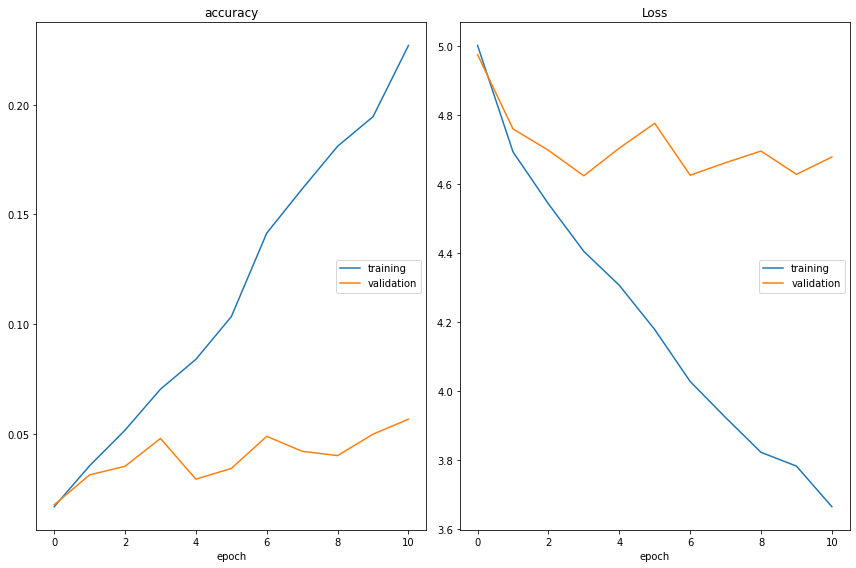

accuracy
	training         	 (min:    0.017, max:    0.227, cur:    0.227)
	validation       	 (min:    0.018, max:    0.057, cur:    0.057)
Loss
	training         	 (min:    3.665, max:    5.002, cur:    3.665)
	validation       	 (min:    4.624, max:    4.975, cur:    4.678)
Restoring model weights from the end of the best epoch: 4.
256/256 [==============================] - 499s 2s/step - loss: 3.6645 - accuracy: 0.2270 - val_loss: 4.6783 - val_accuracy: 0.0566
Epoch 11: early stopping


In [ ]:
# Training the model :

combination_1_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = combination_1_model.fit(train_generator,
                                  steps_per_epoch = train_size // batch_size,
                                  epochs=epochs,
                                  validation_data=val_generator,
                                  validation_steps = val_size // batch_size,
                                  callbacks=[checkpoint_cb_combination_1,
                                             plot_loss_cb_combination_1,
                                             early_stopping_cb_combination_1])

Observation 

This model shows interesting performance (5,7% accuracy on the validation set) but is clearly overfitting the test set.

## - Iteration 14 : Regularized combination model

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/combination_2.h5"


checkpoint_cb_combination_2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                              monitor='val_accuracy',
                                                              verbose=1,
                                                              save_best_only=True,
                                                              mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_combination_2 = PlotLossesKeras()

early_stopping_cb_combination_2 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=7,
                                                                mode='auto',
                                                                verbose=1,
                                                                restore_best_weights=True)


In [ ]:
# Model creation :

combination_2_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                   input_shape=[128,128,3],
                                                                   kernel_size=9, # filters 9x9
                                                                   padding="SAME"),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                              keras.layers.Dropout(0.4),
                                              keras.layers.Flatten(),
                                              keras.layers.Dense(256),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.Dropout(0.4),
                                              keras.layers.Dense(120, activation = 'softmax')])

combination_2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      7808      
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 123008)           

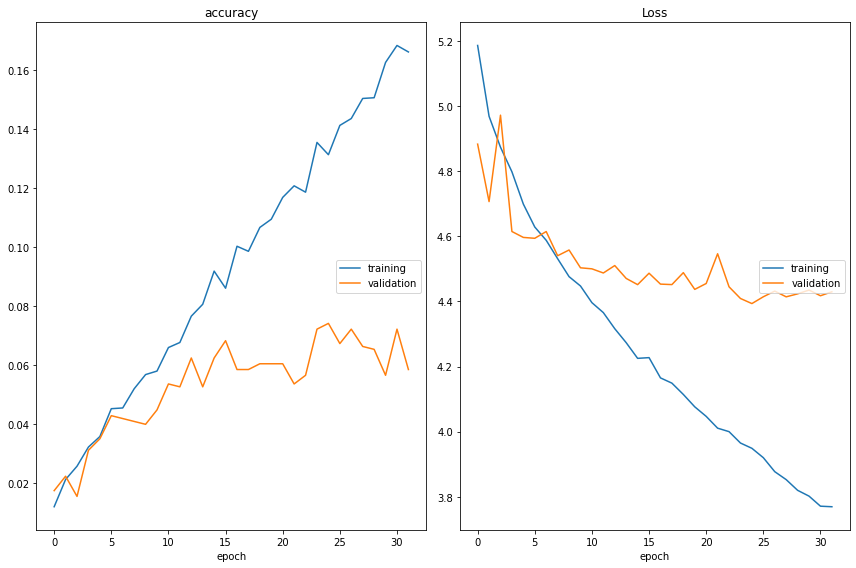

accuracy
	training         	 (min:    0.012, max:    0.168, cur:    0.166)
	validation       	 (min:    0.016, max:    0.074, cur:    0.059)
Loss
	training         	 (min:    3.769, max:    5.186, cur:    3.769)
	validation       	 (min:    4.393, max:    4.972, cur:    4.430)
Restoring model weights from the end of the best epoch: 25.
256/256 [==============================] - 497s 2s/step - loss: 3.7693 - accuracy: 0.1661 - val_loss: 4.4296 - val_accuracy: 0.0586
Epoch 32: early stopping


In [ ]:
# Training the model :

combination_2_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 64
epochs = 100

history = combination_2_model.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_combination_2,
                                          plot_loss_cb_combination_2,
                                          early_stopping_cb_combination_2])

### Observation :

Combining the most promising hyperparameter tuning effects, we got this model, which performs better than any of our last tries ().



## - Iteration 15 : tuning batch-size for better fitting process

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/combination_3.h5"


checkpoint_cb_combination_3 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                              monitor='val_accuracy',
                                                              verbose=1,
                                                              save_best_only=True,
                                                              mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_combination_3 = PlotLossesKeras()

early_stopping_cb_combination_3 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=7,
                                                                mode='auto',
                                                                verbose=1,
                                                                restore_best_weights=True)


In [ ]:
# Model creation :

combination_3_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                   input_shape=[128,128,3],
                                                                   kernel_size=9, # filters 9x9
                                                                   padding="SAME"),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                              keras.layers.Dropout(0.5),
                                              keras.layers.Flatten(),
                                              keras.layers.Dense(256),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.Dropout(0.5),
                                              keras.layers.Dense(120, activation = 'softmax')])

combination_3_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      7808      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

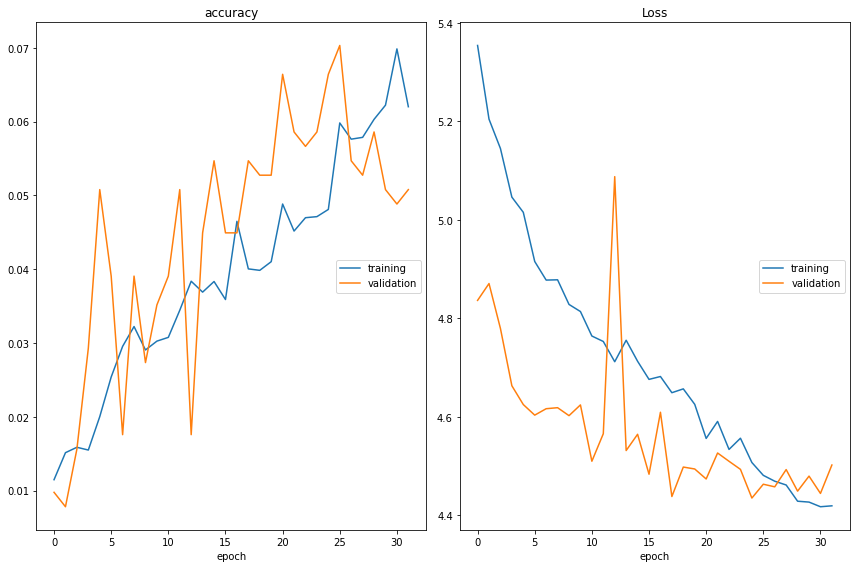

accuracy
	training         	 (min:    0.011, max:    0.070, cur:    0.062)
	validation       	 (min:    0.008, max:    0.070, cur:    0.051)
Loss
	training         	 (min:    4.417, max:    5.354, cur:    4.419)
	validation       	 (min:    4.435, max:    5.088, cur:    4.502)
Restoring model weights from the end of the best epoch: 25.
128/128 [==============================] - 18s 139ms/step - loss: 4.4191 - accuracy: 0.0620 - val_loss: 4.5020 - val_accuracy: 0.0508
Epoch 32: early stopping


In [ ]:
# Training the model :

combination_3_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 128
epochs = 100

history = combination_3_model.fit(train_generator,
                                 steps_per_epoch = train_size // batch_size,
                                 epochs=epochs,
                                 validation_data=val_generator,
                                 validation_steps = val_size // batch_size,
                                 callbacks=[checkpoint_cb_combination_3,
                                            plot_loss_cb_combination_3,
                                            early_stopping_cb_combination_3])

### Observation  :

With higher batch_size, the fitting process got faster but resulted in similar performances.

## - Iteration 16 - Tackling the bottleneck issue with more complex dense layers and Tuning learning rate

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/bottleneck_lr.h5"


checkpoint_cb_bottleneck_lr = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                              monitor='val_accuracy',
                                                              verbose=1,
                                                              save_best_only=True,
                                                              mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_bottleneck_lr = PlotLossesKeras()

early_stopping_cb_bottleneck_lr = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=7,
                                                                mode='auto',
                                                                verbose=1,
                                                                restore_best_weights=True)


In [ ]:
# Model creation :

bottleneck_lr_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                   input_shape=[128,128,3],
                                                                   kernel_size=9, # filters 9x9
                                                                   padding="SAME"),
                                               keras.layers.BatchNormalization(),
                                               keras.layers.Activation('relu'),
                                               keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                               keras.layers.Dropout(0.5),
                                               keras.layers.Flatten(),
                                               keras.layers.Dense(256),
                                               keras.layers.BatchNormalization(),
                                               keras.layers.Activation('relu'),
                                               keras.layers.Dropout(0.5),
                                               keras.layers.Dense(256),
                                               keras.layers.BatchNormalization(),
                                               keras.layers.Activation('relu'),
                                               keras.layers.Dropout(0.5),
                                               keras.layers.Dense(120, activation = 'softmax')])

bottleneck_lr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      7808      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 flatten (Flatten)           (None, 123008)            0

In [ ]:
# Defining the learning rate decay (schedule) :
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

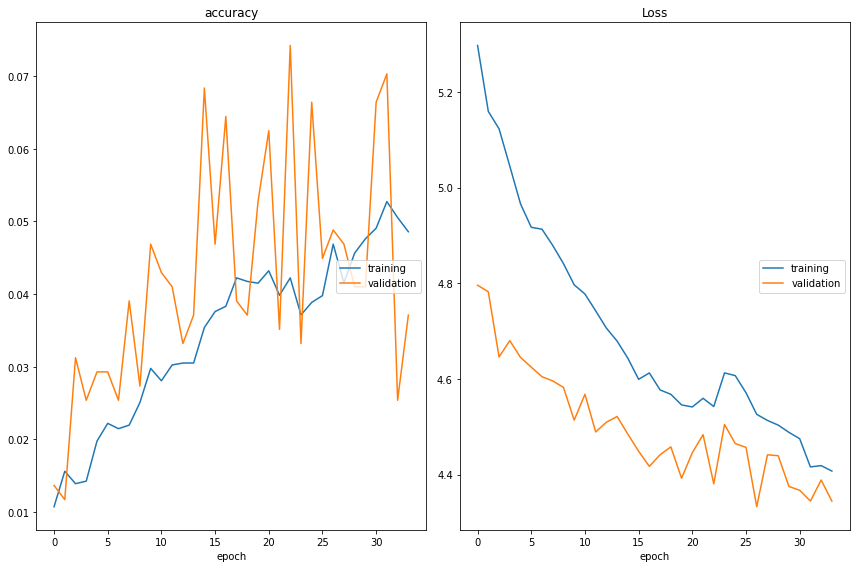

accuracy
	training         	 (min:    0.011, max:    0.053, cur:    0.049)
	validation       	 (min:    0.012, max:    0.074, cur:    0.037)
Loss
	training         	 (min:    4.407, max:    5.297, cur:    4.407)
	validation       	 (min:    4.333, max:    4.796, cur:    4.345)
Restoring model weights from the end of the best epoch: 27.
128/128 [==============================] - 18s 140ms/step - loss: 4.4075 - accuracy: 0.0486 - val_loss: 4.3446 - val_accuracy: 0.0371
Epoch 34: early stopping


In [ ]:
# Training the model :

bottleneck_lr_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=["accuracy"])

batch_size = 128
epochs = 100

history = bottleneck_lr_model.fit(train_generator,
                                  steps_per_epoch = train_size // batch_size,
                                  epochs=epochs,
                                  validation_data=val_generator,
                                  validation_steps = val_size // batch_size,
                                  callbacks=[checkpoint_cb_bottleneck_lr,
                                             plot_loss_cb_bottleneck_lr,
                                             early_stopping_cb_bottleneck_lr])

### Observation : 

## - Iteration 17 :

In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/bottleneck_2.h5"


checkpoint_cb_bottleneck_2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                             monitor='val_accuracy',
                                                             verbose=1,
                                                             save_best_only=True,
                                                             mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_bottleneck_2 = PlotLossesKeras()

early_stopping_cb_bottleneck_2 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                               patience=9,
                                                               mode='auto',
                                                               verbose=1,
                                                               restore_best_weights=True)


In [ ]:
# Model creation :

bottleneck_2_model = keras.models.Sequential([keras.layers.Conv2D(filters=32,
                                                                   input_shape=[128,128,3],
                                                                   kernel_size=9, # filters 9x9
                                                                   padding="SAME"),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.MaxPooling2D(pool_size=(6,6), strides=(2,2)),
                                              keras.layers.Dropout(0.4),
                                              keras.layers.Flatten(),
                                              keras.layers.Dense(512),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.Dropout(0.4),
                                              keras.layers.Dense(128),
                                              keras.layers.BatchNormalization(),
                                              keras.layers.Activation('relu'),
                                              keras.layers.Dropout(0.4),
                                              keras.layers.Dense(120, activation = 'softmax')])

bottleneck_2_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      7808      
                                                                 
 batch_normalization_18 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_19 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 123008)           

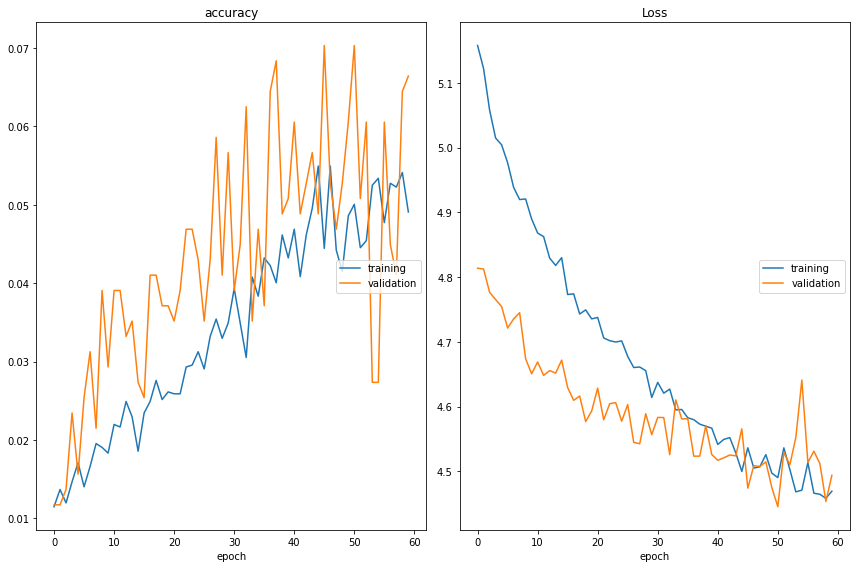

accuracy
	training         	 (min:    0.011, max:    0.055, cur:    0.049)
	validation       	 (min:    0.012, max:    0.070, cur:    0.066)
Loss
	training         	 (min:    4.458, max:    5.158, cur:    4.469)
	validation       	 (min:    4.445, max:    4.814, cur:    4.494)
Restoring model weights from the end of the best epoch: 51.
128/128 [==============================] - 18s 141ms/step - loss: 4.4691 - accuracy: 0.0491 - val_loss: 4.4937 - val_accuracy: 0.0664
Epoch 60: early stopping


In [ ]:
# Training the model :

bottleneck_2_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

batch_size = 128
epochs = 100

history = bottleneck_2_model.fit(train_generator,
                                 steps_per_epoch = train_size // batch_size,
                                 epochs=epochs,
                                 validation_data=val_generator,
                                 validation_steps = val_size // batch_size,
                                 callbacks=[checkpoint_cb_bottleneck_2,
                                            plot_loss_cb_bottleneck_2,
                                            early_stopping_cb_bottleneck_2])

# Other architecture : ResNet-50

For the purpose of this project, these performances are still not enough. Even if we can keep optimizing this model, getting much better performances would require to use more complex architectures and, overall, a lot more data.

In the next parts of this notebook, we try a much more complex network (ResNet-50) trained on this same dataset and, then with data augmentation techniques. Finally, we use the same model, but pre-trained on the ImageNet dataset. 

In [ ]:
# Creation of a ResNet50 model :

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


resnet_model = ResNet50(include_top=False,
                        weights=None, # not pre-trained
                        input_shape = (128,128,3))

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
# Adapting last layers of the ResNet50 to our classification problem using the Functional API from Keras :

num_classes = 120

x = keras.layers.GlobalAveragePooling2D()(resnet_model.output)

predictions = keras.layers.Dense(num_classes, activation = 'softmax')(x)

resnet50_model = keras.Model(inputs=resnet_model.input, outputs=predictions)

resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
# Creating callbacks for the ResNet50 model :
FILE_PATH = MODELS_PATH + "/ResNet50_model.h5"


checkpoint_cb_ResNet50 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                         monitor='val_accuracy',
                                                         verbose=1,
                                                         save_best_only=True,
                                                         mode='max')
plot_loss_cb_ResNet50 = PlotLossesKeras()


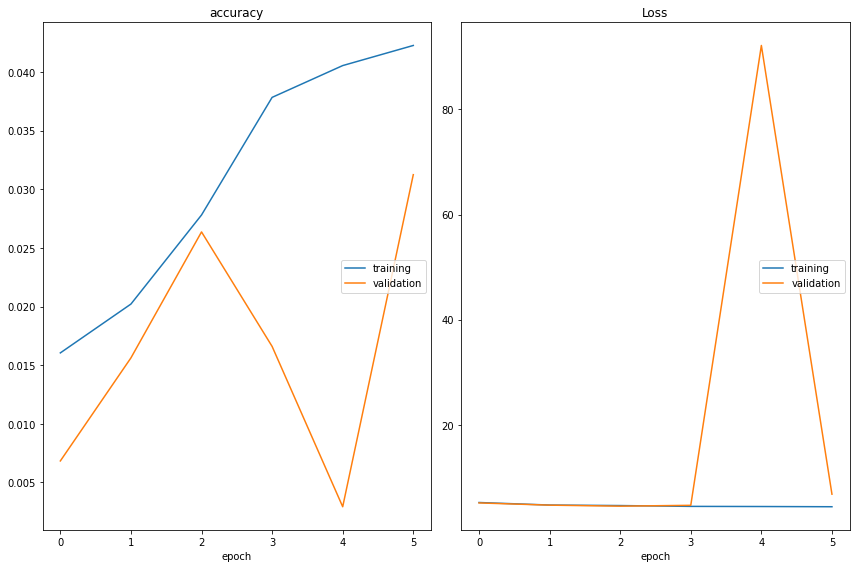

accuracy
	training         	 (min:    0.016, max:    0.042, cur:    0.042)
	validation       	 (min:    0.003, max:    0.031, cur:    0.031)
Loss
	training         	 (min:    4.434, max:    5.237, cur:    4.434)
	validation       	 (min:    4.543, max:   92.144, cur:    6.819)
256/256 [==============================] - 2312s 9s/step - loss: 4.4336 - accuracy: 0.0423 - val_loss: 6.8187 - val_accuracy: 0.0312
Epoch 7/10
  1/256 [..............................] - ETA: 39:36 - loss: 4.2540 - accuracy: 0.0938

KeyboardInterrupt: ignored

In [ ]:
# Training the adapted ResNet50 model :

resnet50_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 10
train_size = 16418
val_size = 2062

history = resnet50_model.fit(train_generator,
                             steps_per_epoch = train_size // batch_size,
                             epochs=epochs,
                             validation_data=val_generator,
                             validation_steps = val_size // batch_size,
                             callbacks=[checkpoint_cb_ResNet50, plot_loss_cb_ResNet50])

On one hand, the model is overfitting the training set; and on another hand, it does not perform well neither (only a little better).

To improve our results, we are going to artificially create new images to get a bigger dataset to train on and add a Dropout layer in the final layers to reduce overfitting :

In [ ]:
## Testing data augmentation techniques :

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt


# Creating a function to get "augmented images" from an image, using the ImageDataGenerator function :

def get_aug_img(image_path: str, 
                nb_augmented_img: int,
                fill_mode='nearest',
                rotation_range=0,
                width_shift_range=0,
                height_shift_range=0,
                shear_range=0,
                zoom_range=0,
                channel_shift_range=0,
                horizontal_flip=False):
  
  # Creating the ImageDataGenerator :
  data_generator = ImageDataGenerator(rotation_range=rotation_range,
                                      width_shift_range=width_shift_range,
                                      height_shift_range=height_shift_range,
                                      shear_range=shear_range,
                                      zoom_range=zoom_range,
                                      channel_shift_range=channel_shift_range,
                                      fill_mode=fill_mode,
                                      horizontal_flip=horizontal_flip)
  
  # Loading the image and making it usable for the ImageDataGenerator :
  original_img = image.load_img(image_path, target_size=(224,224)) # using image module from keras
  x = image.img_to_array(original_img)
  x = x.reshape((1,) + x.shape)

  # Showing the original image :
  fig = plt.figure(figsize=(10,10))
  plt.subplot(1,nb_augmented_img+1,1)
  plt.title('Original')
  plt.imshow(original_img)

  # Creating augmented images :
  augmented_images = []
  for i in range(nb_augmented_img): # getting augmented images :
    plt.figure(i+1, figsize=(10,10))
    augmented_img = data_generator.flow(x, batch_size = 1)[0].reshape((224, 224, 3))
    plt.subplot(1,nb_augmented_img+1,i+1+1)
    plt.title(f'Augmented {i+1}')
    plt.imshow(image.array_to_img(augmented_img))


# 0. Getting the test image :

TRAIN_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning/train')
test_image_folder_path = os.path.join(TRAIN_PATH, "n02106166-Border_collie")
img_path = os.path.join(test_image_folder_path, os.listdir(test_image_folder_path)[46]) # selecting an image 



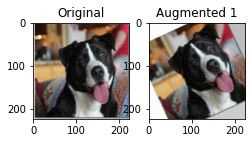

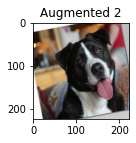

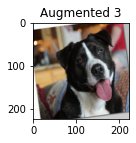

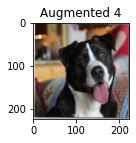

In [ ]:
# 1. Rotation 

get_aug_img(image_path=img_path, nb_augmented_img=4, rotation_range=40)

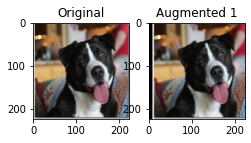

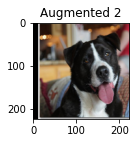

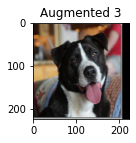

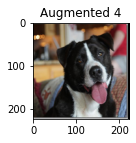

In [ ]:
# 2. Width shift :
get_aug_img(image_path=img_path, nb_augmented_img=4, width_shift_range=0.25, fill_mode='constant')

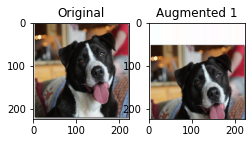

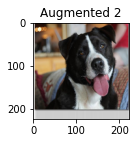

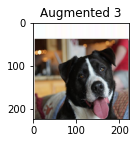

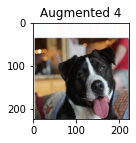

In [ ]:
# 3. Height shift :
get_aug_img(image_path=img_path, nb_augmented_img=4, height_shift_range=0.25, fill_mode='nearest')

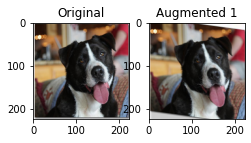

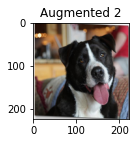

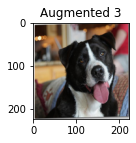

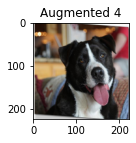

In [ ]:
# 4. Shear :
get_aug_img(image_path=img_path, nb_augmented_img=4, shear_range=10)

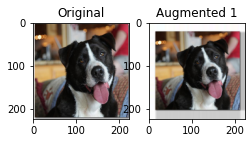

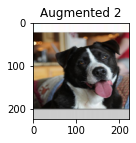

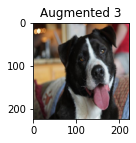

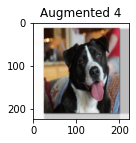

In [ ]:
# 5. Zoom :
get_aug_img(image_path=img_path, nb_augmented_img=4, zoom_range=0.25)

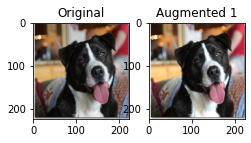

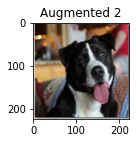

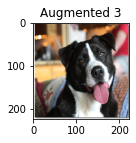

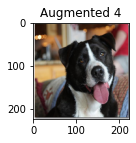

In [ ]:
# 6. Channel shift :
get_aug_img(image_path=img_path, nb_augmented_img=4, channel_shift_range=50)

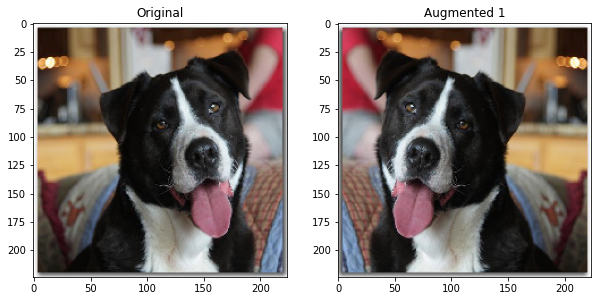

In [ ]:
# 7. Horizontal flip :
get_aug_img(image_path=img_path, nb_augmented_img=1, horizontal_flip=True)

In [ ]:
## New data generators :

ROOT_PATH = os.getcwd()
TRAIN_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning/train')
TEST_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning/test')
VALIDATION_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning/validation')


# Batch generation :

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=10,
                                   zoom_range=0.25,
                                   channel_shift_range=50,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    batch_size=32,
                                                    target_size=(128, 128), # try to tackle the dimensional pb during fitting
                                                    class_mode="categorical") 
                                                    # classes are automatically inferred from the subdirectory structure

validation_datagen = ImageDataGenerator(rescale=1./255)

val_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                       batch_size=32,
                                                       target_size=(128, 128),
                                                       class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2062 images belonging to 120 classes.


In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.2 MB/s 


In [ ]:
# Creating callbacks for the augmented ResNet50 model :
ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)
FILE_PATH = MODELS_PATH + "/ResNet50_augmented_and_dropout.h5"

import keras
from livelossplot import PlotLossesKeras

checkpoint_cb_ResNet50_2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                         monitor='val_accuracy',
                                                         verbose=1,
                                                         save_best_only=True,
                                                         mode='max')
plot_loss_cb_ResNet50_2 = PlotLossesKeras()


In [ ]:
## Creation of the new model :

# Convolutional layers :

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


resnet_model = ResNet50(include_top=False,
                        weights=None, # not pre-trained
                        input_shape = (128,128,3))

# Last layers with dropout:

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x2 = keras.layers.Dropout(0.33)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_dropout = keras.Model(inputs=resnet_model.input, outputs=predictions)

resnet50_dropout.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

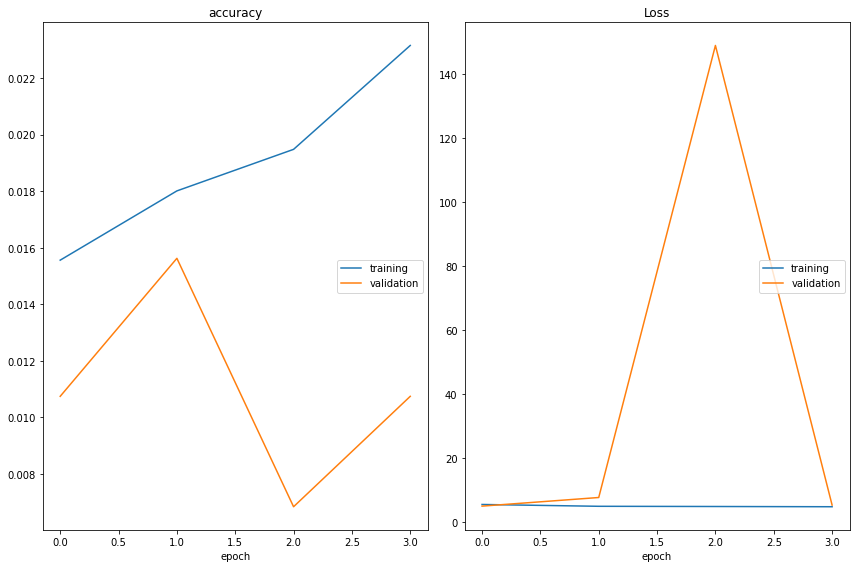

accuracy
	training         	 (min:    0.016, max:    0.023, cur:    0.023)
	validation       	 (min:    0.007, max:    0.016, cur:    0.011)
Loss
	training         	 (min:    4.744, max:    5.451, cur:    4.744)
	validation       	 (min:    4.936, max:  148.823, cur:    5.267)
256/256 [==============================] - 2164s 8s/step - loss: 4.7438 - accuracy: 0.0232 - val_loss: 5.2670 - val_accuracy: 0.0107
Epoch 5/10
 50/256 [====>.........................] - ETA: 28:05 - loss: 4.6793 - accuracy: 0.0331

In [ ]:
# Training the augmented ResNet50 model :

resnet50_dropout.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 10
train_size = 16418
val_size = 2062

history = resnet50_dropout.fit(train_generator,
                               steps_per_epoch = train_size // batch_size,
                               epochs=epochs,
                               validation_data=val_generator,
                               validation_steps = val_size // batch_size,
                               callbacks=[checkpoint_cb_ResNet50_2, plot_loss_cb_ResNet50_2])

These partial results show no much improvement from this neural network than the ones before.



# Transfer Learning

We are now going to use a Transfer learning technique : we will use the same ResNet-50 model, but yet pretrained on the ImageNet dataset, and just change the last Fully Connected layers to adapt it to our problem.

This transfer learning technique is explained here : 
https://keras.io/guides/transfer_learning/

In [ ]:
## ResNet model without last layers :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (128,128,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

base_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_pretrained = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [ ]:
# Creating callbacks for the pretrained ResNet50 model :
ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)
FILE_PATH = MODELS_PATH + "/ResNet50_pretrained.h5"

import keras
from livelossplot import PlotLossesKeras

checkpoint_cb_ResNet50_pretrained = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                                    monitor='val_accuracy',
                                                                    verbose=1,
                                                                    save_best_only=True,
                                                                    mode='max')
plot_loss_cb_ResNet50_pretrained = PlotLossesKeras()

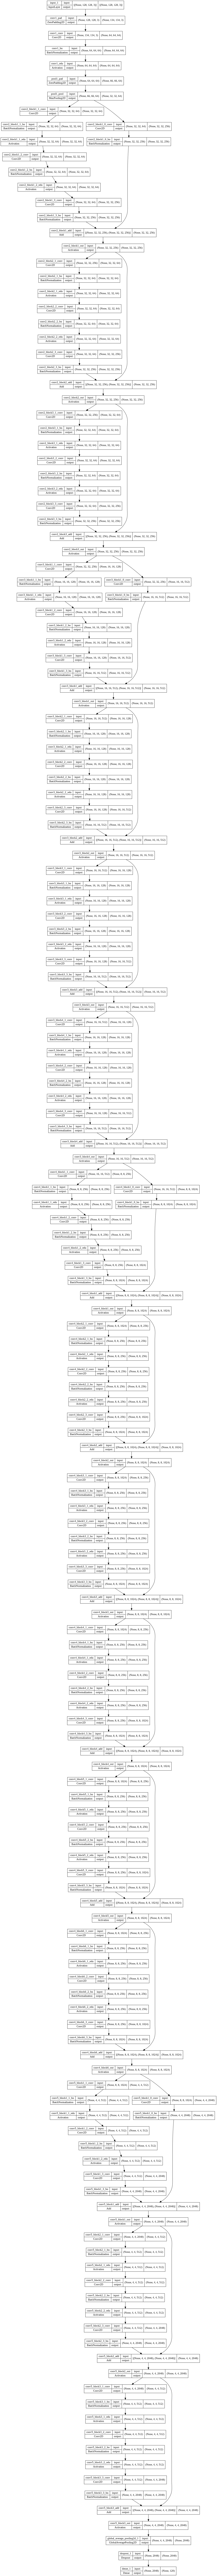

In [ ]:
# Save and plot the scheme figure :

FIGURES_PATH = os.path.join(ROOT_PATH, "figures")
os.makedirs(FIGURES_PATH, exist_ok=True)
tf.keras.utils.plot_model(resnet50_pretrained, FIGURES_PATH + "/resnet50_pretrained.png", show_shapes=True)

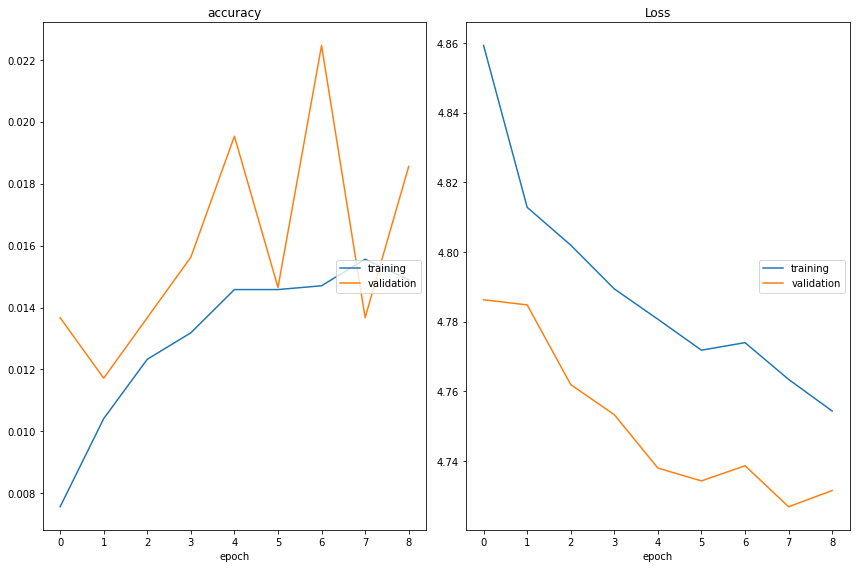

accuracy
	training         	 (min:    0.008, max:    0.016, cur:    0.015)
	validation       	 (min:    0.012, max:    0.022, cur:    0.019)
Loss
	training         	 (min:    4.754, max:    4.859, cur:    4.754)
	validation       	 (min:    4.727, max:    4.786, cur:    4.732)
256/256 [==============================] - 553s 2s/step - loss: 4.7544 - accuracy: 0.0149 - val_loss: 4.7315 - val_accuracy: 0.0186
Epoch 10/10
 12/256 [>.............................] - ETA: 7:52 - loss: 4.7303 - accuracy: 0.0130

KeyboardInterrupt: ignored

In [ ]:
# Training the pretrained ResNet50 model :

resnet50_pretrained.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 10
train_size = 16418
val_size = 2062

history = resnet50_pretrained.fit(train_generator,
                                  steps_per_epoch = train_size // batch_size,
                                  epochs=epochs,
                                  validation_data=val_generator,
                                  validation_steps = val_size // batch_size,
                                  callbacks=[checkpoint_cb_ResNet50_pretrained, plot_loss_cb_ResNet50_pretrained])

These performances are quiet bad too, suggesting we need to use the dedicated preprocessing steps and the same shape of inputs for preprocessed images.

# New tests with new preprocessing steps :

In [ ]:
### Loading data directly from url :

# Importing librairies :
import requests
import math
import tarfile
import shutil

# Creating folder :
DATA_PATH = os.path.join(ROOT_PATH, "data")
os.makedirs(DATA_PATH, exist_ok=True)

# Downloading data :
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
if url.find('/'):
  file_name = url.rsplit('/', 1)[1]

r = requests.get(url, allow_redirects=True)
open(file_name, 'wb').write(r.content)

# Extracting data from tarfile :
download_path = os.path.join('/content', file_name)
archive_file_path = os.path.join(DATA_PATH, file_name)
shutil.move(download_path, archive_file_path)

with tarfile.open(archive_file_path, 'r') as file:
  file.extractall(DATA_PATH)

print("Data downloaded and extracted from archive.")
print("Saved to ", DATA_PATH)




Data downloaded and extracted from archive.
Saved to  /content/data


In [ ]:
IMAGE_FOLDER_PATH = os.path.join(DATA_PATH, 'Images')
IMAGE_FOLDER_PATH

'/content/data/Images'

In [ ]:
### Splitting data into train_set, validation_set and test_set :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :
IMAGE_FOLDER_PATH = os.path.join(DATA_PATH, 'Images')

TRAIN_PATH = os.path.join(DATA_PATH, 'train')
os.makedirs(TRAIN_PATH, exist_ok=True)

TEST_PATH = os.path.join(DATA_PATH, 'test')
os.makedirs(TRAIN_PATH, exist_ok=True)

VALIDATION_PATH = os.path.join(DATA_PATH, 'validation')
os.makedirs(VALIDATION_PATH, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(IMAGE_FOLDER_PATH): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH, breed_folder)
    breed_path_test = os.path.join(TEST_PATH, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
### Batch generation :

from tensorflow.keras.applications.resnet50 import preprocess_input 
# The images are converted from RGB to BGR, 
# then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.25,
                                   zoom_range=0.25,
                                   channel_shift_range=25,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    batch_size=32,
                                                    target_size=(224, 224), # same as default for the ResNet-50 model
                                                    class_mode="categorical") 
                                                    # classes are automatically inferred from the subdirectory structure

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                       batch_size=32,
                                                       target_size=(224, 224),
                                                       class_mode='categorical')

NameError: ignored

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 9.7 MB/s 


In [ ]:
### Creating callbacks for the pretrained ResNet50 model with these preparation steps :
ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)
FILE_PATH = MODELS_PATH + "/ResNet50_pretrained_2.h5"

from livelossplot import PlotLossesKeras

checkpoint_cb_ResNet50_pretrained_2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                                      monitor='val_accuracy',
                                                                      verbose=1,
                                                                      save_best_only=True,
                                                                      mode='max')
plot_loss_cb_ResNet50_pretrained_2 = PlotLossesKeras()

In [ ]:
### Creating the new ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_pretrained_2 = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

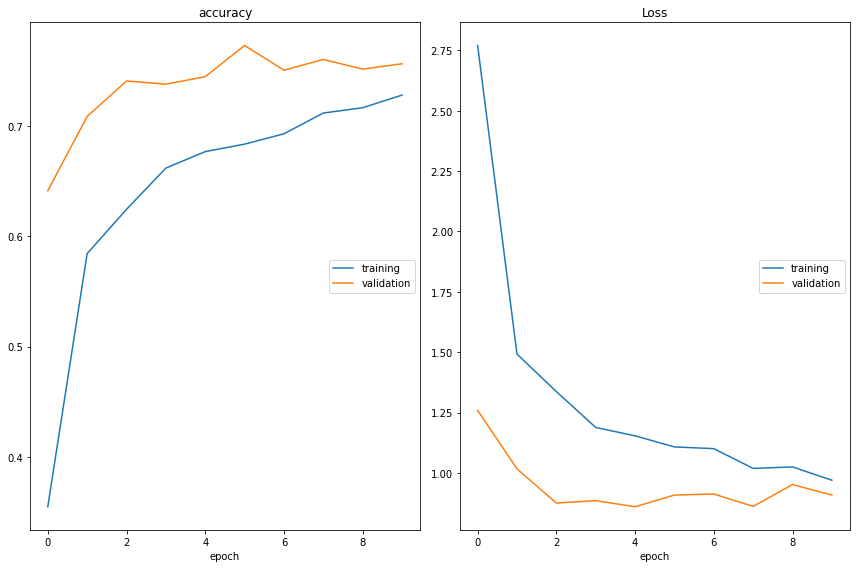

accuracy
	training         	 (min:    0.355, max:    0.728, cur:    0.728)
	validation       	 (min:    0.642, max:    0.773, cur:    0.757)
Loss
	training         	 (min:    0.969, max:    2.771, cur:    0.969)
	validation       	 (min:    0.860, max:    1.259, cur:    0.908)
256/256 [==============================] - 1548s 6s/step - loss: 0.9694 - accuracy: 0.7284 - val_loss: 0.9079 - val_accuracy: 0.7568


In [ ]:
### Training the pretrained ResNet50 model with these preparation steps :

resnet50_pretrained_2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 10


history = resnet50_pretrained_2.fit(train_generator,
                                    steps_per_epoch = train_size // batch_size,
                                    epochs=epochs,
                                    validation_data=val_generator,
                                    validation_steps = val_size // batch_size,
                                    callbacks=[checkpoint_cb_ResNet50_pretrained_2, plot_loss_cb_ResNet50_pretrained_2])

Performances are much better for this pretrained model using the right preparation steps. 

As expected by the presence of a dropout layer between the last layers (making this model more robust to variations), the accuracy on the validation set is higher than the one on the training set. 

In [ ]:
# Evaluation on test set :

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = resnet50_pretrained_2.evaluate(test_generator, steps=test_size // batch_size)

results

Found 2110 images belonging to 120 classes.
32/32 [==============================] - 162s 5s/step - loss: 0.9373 - accuracy: 0.7256


[0.9373422861099243, 0.7255859375]

These results (72.84% on test set, 75.68% on validation set and 72.56% on test set) are coherent and don't show any overfitting.

As it seems yet sufficient for our purpose, we can still expect to get higher performances with another model as an accuracy of around 95% may seem reasonable for a human expert on this task.


Another transfer learning technique would be to fit all parameters (even the ones pretrained on ImageNet) but with a very small learning rate (but it would take even more time).

## Testing the added value of data augmentation :

In [ ]:
# Recreating batch generators, without data augmentation :

### Batch generation :

from tensorflow.keras.applications.resnet50 import preprocess_input 
# The images are converted from RGB to BGR, 
# then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

from keras.preprocessing.image import ImageDataGenerator

train_datagen_no_augmented = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator_no_augmented = train_datagen_no_augmented.flow_from_directory(TRAIN_PATH,
                                                                              batch_size=32,
                                                                              target_size=(224, 224), # same as default for the ResNet-50 model
                                                                              class_mode="categorical") 
                                                                              # classes are automatically inferred from the subdirectory structure

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                       batch_size=32,
                                                       target_size=(224, 224),
                                                       class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
# Creating callbacks :
FILE_PATH = MODELS_PATH + "/resnet50_pretrained_no_augmented.h5"


checkpoint_cb_no_augmented = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                        monitor='val_accuracy',
                                                        verbose=1,
                                                        save_best_only=True,
                                                        mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_no_augmented = PlotLossesKeras()

early_stopping_cb_no_augmented = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                               patience=7,
                                                               mode='auto',
                                                               verbose=1,
                                                               restore_best_weights=True)

In [ ]:
# Defining the learning rate decay (schedule) :
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

In [ ]:
### Creating the same ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_pretrained_3 = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained_3.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

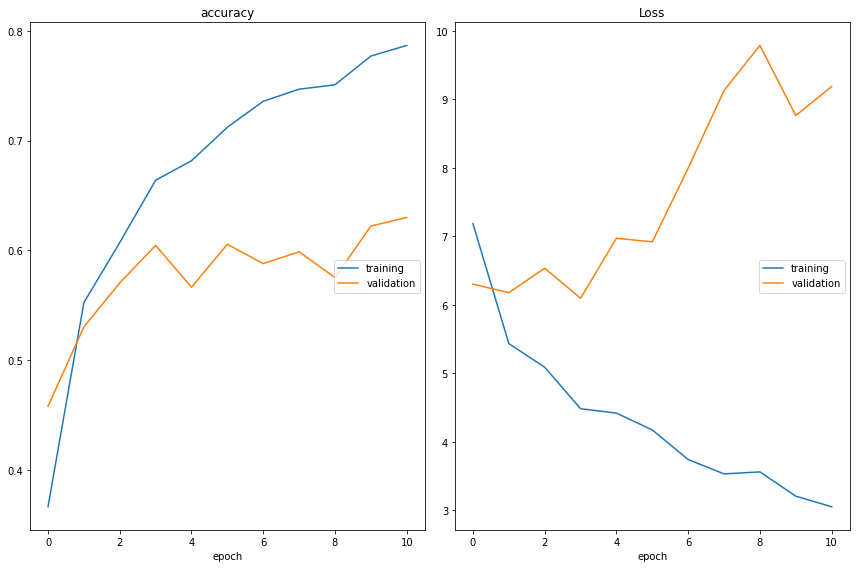

accuracy
	training         	 (min:    0.366, max:    0.787, cur:    0.787)
	validation       	 (min:    0.458, max:    0.630, cur:    0.630)
Loss
	training         	 (min:    3.051, max:    7.184, cur:    3.051)
	validation       	 (min:    6.095, max:    9.786, cur:    9.187)
256/256 [==============================] - 50s 194ms/step - loss: 3.0508 - accuracy: 0.7866 - val_loss: 9.1868 - val_accuracy: 0.6299
Epoch 11: early stopping


In [ ]:
### Training the same pretrained ResNet50 model without data augmentation :

resnet50_pretrained_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 50


history = resnet50_pretrained_3.fit(train_generator_no_augmented,
                                    steps_per_epoch = train_size // batch_size,
                                    epochs=epochs,
                                    validation_data=val_generator,
                                    validation_steps = val_size // batch_size,
                                    callbacks=[checkpoint_cb_no_augmented, early_stopping_cb_no_augmented, plot_loss_cb_no_augmented])

## Observation :

The same pretrained ResNet50 model; without data augmentation; got its performances stuck beyond the 70% accuracy on the validation set and its loss diverge fastly.

Comparing to the model using data augmentation technique, we can see here that data augmentation has been able to regularize the model, allowing it to reach almost 80% accuracy on the validation set.

# Optimizing the ResNet50 model with MLflow tracking :

In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 21.6 MB/s 
     |████████████████████████████████| 209 kB 69.0 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 147 kB 51.1 MB/s 
     |████████████████████████████████| 181 kB 74.0 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 140 kB 77.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 59 kB 8.6 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139102 sha256=3ceff80ea01e114965df9a6e7caa997adc9834a05c0f6f1a09149e840518ebd8
  Stored in directory: /root/.cache/pip/wheels/3f/

In [ ]:
## Initialize a MLflow server :
get_ipython().system_raw("mlflow ui --port 5000 &")

In [ ]:
## Make it accessible for Colab and optionally add authentication

!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

     |████████████████████████████████| 745 kB 35.8 MB/s 
Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://1c9b-34-124-210-141.ngrok.io


In [ ]:
### Imports and autolog :
import mlflow.tensorflow

mlflow.tensorflow.autolog()

In [ ]:
### Splitting data into train_set, validation_set and test_set :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :
IMAGE_FOLDER_PATH = os.path.join(DATA_PATH, 'Images')

TRAIN_PATH = os.path.join(DATA_PATH, 'train')
os.makedirs(TRAIN_PATH, exist_ok=True)

TEST_PATH = os.path.join(DATA_PATH, 'test')
os.makedirs(TRAIN_PATH, exist_ok=True)

VALIDATION_PATH = os.path.join(DATA_PATH, 'validation')
os.makedirs(VALIDATION_PATH, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(IMAGE_FOLDER_PATH): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH, breed_folder)
    breed_path_test = os.path.join(TEST_PATH, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
### Batch generation :

from tensorflow.keras.applications.resnet50 import preprocess_input 
# The images are converted from RGB to BGR, 
# then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.25,
                                   zoom_range=0.25,
                                   channel_shift_range=25,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    batch_size=32,
                                                    target_size=(224, 224), # same as default for the ResNet-50 model
                                                    class_mode="categorical") 
                                                    # classes are automatically inferred from the subdirectory structure

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                       batch_size=32,
                                                       target_size=(224, 224),
                                                       class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.5 MB/s 


In [ ]:
### Creating callbacks :

# Models path

ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)

FILE_PATH = MODELS_PATH + "/resnet50_pretrained_mlf1.h5"


checkpoint_cb_mlf1 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_mlf1 = PlotLossesKeras()

early_stopping_cb_mlf1= keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=7,
                                                      mode='auto',
                                                      verbose=1,
                                                      restore_best_weights=True)

In [ ]:
# Defining the learning rate decay (schedule) :
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

In [ ]:
### Creating the same ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_pretrained_mlf1 = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained_mlf1.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

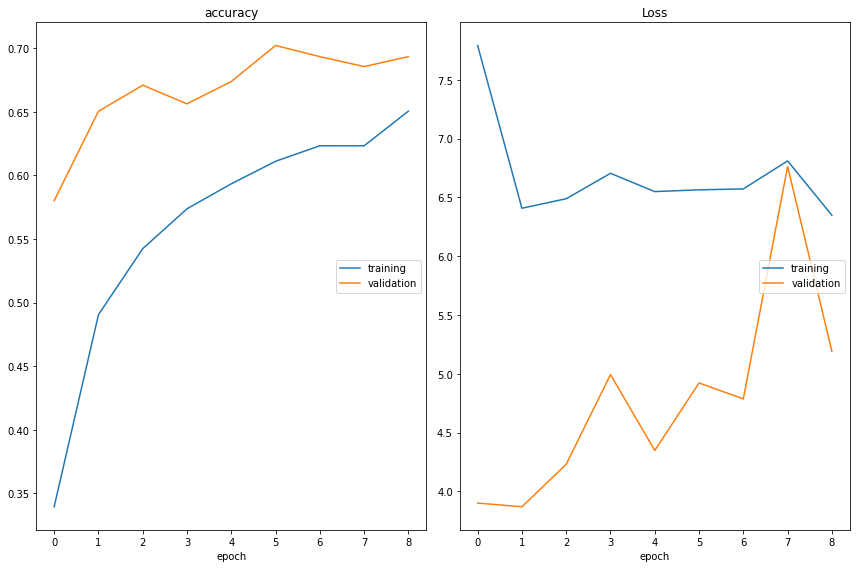

accuracy
	training         	 (min:    0.339, max:    0.651, cur:    0.651)
	validation       	 (min:    0.580, max:    0.702, cur:    0.693)
Loss
	training         	 (min:    6.348, max:    7.792, cur:    6.348)
	validation       	 (min:    3.869, max:    6.763, cur:    5.191)
256/256 [==============================] - 121s 471ms/step - loss: 6.3479 - accuracy: 0.6505 - val_loss: 5.1908 - val_accuracy: 0.6934
Epoch 9: early stopping


2022/09/21 09:12:46 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/09/21 09:12:59 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp_np52myp/model, flavor: keras), fall back to return ['tensorflow==2.8.2', 'keras==2.8.0']. Set logging level to DEBUG to see the full traceback.


In [ ]:
### Training the same pretrained ResNet50 model :

resnet50_pretrained_mlf1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 100

import mlflow

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.tensorflow.autolog()
  history = resnet50_pretrained_mlf1.fit(train_generator,
                                         steps_per_epoch = train_size // batch_size,
                                         epochs=epochs,
                                         validation_data=val_generator,
                                         validation_steps = val_size // batch_size,
                                         callbacks=[checkpoint_cb_mlf1, early_stopping_cb_mlf1, plot_loss_cb_mlf1])

## New run :

Without learning rate scheduling :

In [ ]:
### Creating callbacks :

# Models path

ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)

FILE_PATH = MODELS_PATH + "/resnet50_pretrained_mlf2.h5"


checkpoint_cb_mlf2 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_mlf2 = PlotLossesKeras()

early_stopping_cb_mlf2 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=7,
                                                       mode='auto',
                                                       verbose=1,
                                                       restore_best_weights=True)

In [ ]:
### Creating the same ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

resnet50_pretrained_mlf2 = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained_mlf2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

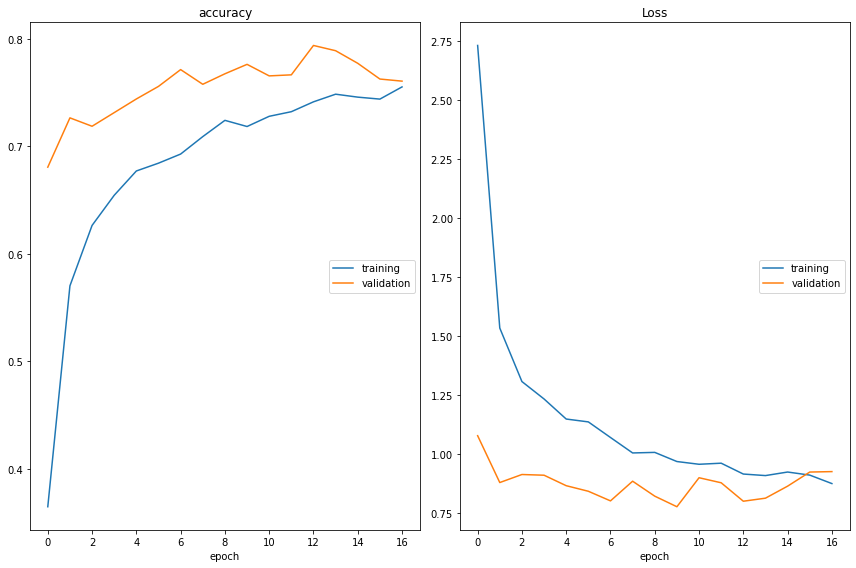

accuracy
	training         	 (min:    0.365, max:    0.755, cur:    0.755)
	validation       	 (min:    0.681, max:    0.794, cur:    0.761)
Loss
	training         	 (min:    0.876, max:    2.732, cur:    0.876)
	validation       	 (min:    0.778, max:    1.079, cur:    0.927)
256/256 [==============================] - 119s 464ms/step - loss: 0.8763 - accuracy: 0.7554 - val_loss: 0.9270 - val_accuracy: 0.7607
Epoch 17: early stopping


2022/09/21 09:56:59 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/09/21 09:57:11 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/09/21 09:57:11 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.15+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
### Training the same pretrained ResNet50 model but without learning rate scheduling :

resnet50_pretrained_mlf2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 100


with mlflow.start_run(run_name="ResNet50 w/o learning rate scheduling"):
  mlflow.tensorflow.autolog()
  history = resnet50_pretrained_mlf2.fit(train_generator,
                                         steps_per_epoch = train_size // batch_size,
                                         epochs=epochs,
                                         validation_data=val_generator,
                                         validation_steps = val_size // batch_size,
                                         callbacks=[checkpoint_cb_mlf2, early_stopping_cb_mlf2, plot_loss_cb_mlf2])

## New run : new dense layers on top of the ResNet50

In [ ]:
### Creating callbacks :

# Models path

ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)

FILE_PATH = MODELS_PATH + "/resnet50_pretrained_mlf3.h5"


checkpoint_cb_mlf3 = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_mlf3 = PlotLossesKeras()

early_stopping_cb_mlf3 = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=7,
                                                       mode='auto',
                                                       verbose=1,
                                                       restore_best_weights=True)

In [ ]:
### Creating the same ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.2)(x1)
x3 = keras.layers.Dense(512)(x2)
x4 = keras.layers.Dropout(0.2)(x3)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x4)

resnet50_pretrained_mlf3 = keras.Model(inputs=base_model.input, outputs=predictions)

resnet50_pretrained_mlf3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

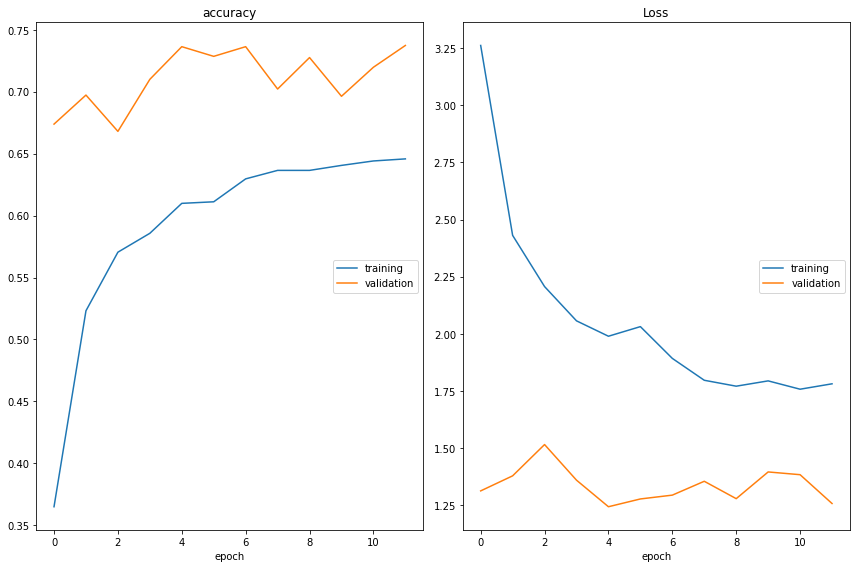

accuracy
	training         	 (min:    0.365, max:    0.646, cur:    0.646)
	validation       	 (min:    0.668, max:    0.737, cur:    0.737)
Loss
	training         	 (min:    1.758, max:    3.261, cur:    1.781)
	validation       	 (min:    1.244, max:    1.516, cur:    1.258)
256/256 [==============================] - 121s 473ms/step - loss: 1.7815 - accuracy: 0.6458 - val_loss: 1.2578 - val_accuracy: 0.7373
Epoch 12: early stopping


2022/09/21 10:28:43 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/09/21 10:28:55 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/09/21 10:28:55 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.15+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
### Training the same pretrained ResNet50 model but without learning rate scheduling :

resnet50_pretrained_mlf3.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 100


with mlflow.start_run(run_name="ResNet50 with a 512-units FC layer on top"):
  mlflow.tensorflow.autolog()
  history = resnet50_pretrained_mlf3.fit(train_generator,
                                         steps_per_epoch = train_size // batch_size,
                                         epochs=epochs,
                                         validation_data=val_generator,
                                         validation_steps = val_size // batch_size,
                                         callbacks=[checkpoint_cb_mlf3, early_stopping_cb_mlf3, plot_loss_cb_mlf3])

# Final model to save

In [ ]:
### Splitting data into train_set, validation_set and test_set :

# Proportions :
train_proportion = 0.8
test_proportion = 0.1
val_proportion = 0.1

# Creating new folders :
IMAGE_FOLDER_PATH = os.path.join(DATA_PATH, 'Images')

TRAIN_PATH = os.path.join(DATA_PATH, 'train')
os.makedirs(TRAIN_PATH, exist_ok=True)

TEST_PATH = os.path.join(DATA_PATH, 'test')
os.makedirs(TRAIN_PATH, exist_ok=True)

VALIDATION_PATH = os.path.join(DATA_PATH, 'validation')
os.makedirs(VALIDATION_PATH, exist_ok=True)

## Creation of counters :
train_size = 0
test_size = 0
val_size = 0
breed_counter = 0

### Creating splits :

print("Creating splits and saving images to train/test/val folders...")

for breed_folder in os.listdir(IMAGE_FOLDER_PATH): # loop over all unique-breed folders
    
    # Updating counter :
    breed_counter = breed_counter + 1
    
    # Saving related pathes :
    breed_path_original = os.path.join(IMAGE_FOLDER_PATH, breed_folder)
    breed_path_train = os.path.join(TRAIN_PATH, breed_folder)
    breed_path_test = os.path.join(TEST_PATH, breed_folder)
    breed_path_validation = os.path.join(VALIDATION_PATH, breed_folder)
    
    # Creating unique-breed folders in train, test and validation folders :
    os.makedirs(breed_path_train, exist_ok=True)
    os.makedirs(breed_path_test, exist_ok=True)
    os.makedirs(breed_path_validation, exist_ok=True)
    
    # List of all images for this breed :
    breed_images_list = os.listdir(breed_path_original)
    breed_number_of_images = len(breed_images_list)
    
    # Allocation of images indexes in train, test and validation sets :
    test_val_threshold = test_proportion
    val_train_threshold = test_val_threshold + val_proportion
    
    breed_list_test = breed_images_list[:math.ceil(test_val_threshold*breed_number_of_images)]
    breed_list_val = breed_images_list[math.ceil(test_val_threshold*breed_number_of_images):math.ceil(val_train_threshold*breed_number_of_images)]
    breed_list_train = breed_images_list[math.ceil(val_train_threshold*breed_number_of_images):]
    
    # Test to check if every image is allocated to data set :
    
    try:
        assert len(breed_list_test) + len(breed_list_val) + len(breed_list_train) == breed_number_of_images
    except AssertionError :
        print("Error : each image of the breed from folder ", breed_folder, " has not been allocated to train / test / val sets.")
        break
    
    # Allocation of images in the right folders :
    
    for image in breed_list_test:
        test_size = test_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_test, image)
        shutil.copyfile(original_file_path, copy_file_path)
        
    for image in breed_list_val:
        val_size = val_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_validation, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
    for image in breed_list_train:
        train_size = train_size + 1
        original_file_path = os.path.join(breed_path_original, image)
        copy_file_path = os.path.join(breed_path_train, image)
        shutil.copyfile(original_file_path, copy_file_path)
                        
print("Done.")

print("Number of classes (breeds) : ", breed_counter)
print("Train set size : ", train_size)
print("Validation set size : ", val_size)
print("Test set size : ", test_size)
    

Creating splits and saving images to train/test/val folders...
Done.
Number of classes (breeds) :  120
Train set size :  16418
Validation set size :  2052
Test set size :  2110


In [ ]:
### Batch generation :

from tensorflow.keras.applications.resnet50 import preprocess_input 
# The images are converted from RGB to BGR, 
# then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.25,
                                   zoom_range=0.25,
                                   channel_shift_range=25,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                    batch_size=32,
                                                    target_size=(224, 224), # same as default for the ResNet-50 model
                                                    class_mode="categorical") 
                                                    # classes are automatically inferred from the subdirectory structure

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = validation_datagen.flow_from_directory(VALIDATION_PATH,
                                                       batch_size=32,
                                                       target_size=(224, 224),
                                                       class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2052 images belonging to 120 classes.


In [ ]:
# Saving dictionary of classes for further use :
dict_classes = train_generator.class_indices

import pickle
dict_file = open("dict_classes.pkl", "wb")
pickle.dump(dict_classes, dict_file)
dict_file.close()

print(dict_classes)

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_terrier': 31, 'n02093859-Kerry_blue

In [ ]:
# Downloading the dictionnary of classes for further use :
from google.colab import files
files.download('dict_classes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### Creating callbacks :

# Models path

ROOT_PATH = os.path.join('/content', 'drive/MyDrive/OpenClassroom/Projet 6 - Classez des images avec des algorithmes de Deep Learning')
MODELS_PATH = os.path.join(ROOT_PATH, "models")
os.makedirs(MODELS_PATH, exist_ok=True)

FILE_PATH = MODELS_PATH + "/final_model.h5"


checkpoint_cb_final_model = keras.callbacks.ModelCheckpoint(filepath=FILE_PATH,
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_final_model = PlotLossesKeras()

early_stopping_cb_final_model = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=9,
                                                              mode='auto',
                                                              verbose=1,
                                                              restore_best_weights=True)

In [ ]:
### Creating the new ResNet50 pretrained model :

# Definition of the pretrained ResNet50 model :
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False,
                      input_shape = (224,224,3),
                      weights = 'imagenet') # pretrained on ImageNet

# Freezing its layers weigth :
base_model.trainable = False

## Creating new FC layers to train on top of the base model :

nb_classes = 120

x1 = keras.layers.GlobalAveragePooling2D()(base_model.output)
x2 = keras.layers.Dropout(0.15)(x1)
predictions = keras.layers.Dense(nb_classes, activation = 'softmax')(x2)

final_model = keras.Model(inputs=base_model.input, outputs=predictions)

final_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

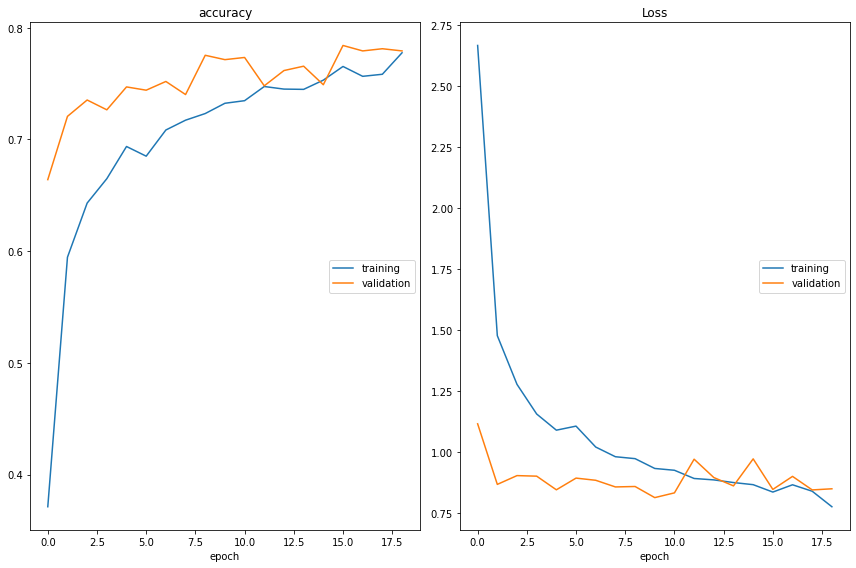

accuracy
	training         	 (min:    0.371, max:    0.778, cur:    0.778)
	validation       	 (min:    0.664, max:    0.784, cur:    0.779)
Loss
	training         	 (min:    0.778, max:    2.667, cur:    0.778)
	validation       	 (min:    0.815, max:    1.117, cur:    0.851)
Restoring model weights from the end of the best epoch: 10.
256/256 [==============================] - 115s 448ms/step - loss: 0.7776 - accuracy: 0.7776 - val_loss: 0.8511 - val_accuracy: 0.7793
Epoch 19: early stopping


In [ ]:
### Training the final model :

final_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"]) # with adam optimizer

batch_size = 64
epochs = 40


history = final_model.fit(train_generator,
                          steps_per_epoch = train_size // batch_size,
                          epochs=epochs,
                          validation_data=val_generator,
                          validation_steps = val_size // batch_size,
                          callbacks=[checkpoint_cb_final_model, plot_loss_cb_final_model, early_stopping_cb_final_model])

In [ ]:
# Evaluation on test set :

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

results = final_model.evaluate(test_generator, steps=test_size // batch_size)

results

Found 2110 images belonging to 120 classes.
32/32 [==============================] - 5s 164ms/step - loss: 1.0372 - accuracy: 0.7217


[1.0372240543365479, 0.7216796875]